In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import RandomizedSearchCV
from imblearn.pipeline import make_pipeline as make_imb_pipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from category_encoders import TargetEncoder
from sklearn.model_selection import train_test_split,cross_val_score,cross_validate
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score,confusion_matrix,roc_auc_score,roc_curve,precision_recall_curve

In [2]:
def load_data(file_path):
    df = pd.read_csv(file_path, encoding='latin1')
    return df

In [3]:
df = load_data(r"C:\Users\user\Desktop\Projects\British_Airways_Project\Data\customer_booking.csv")

- df will be the original dataframe

In [4]:
data = df.copy()

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [5]:
data.shape

(50000, 14)

In [9]:
data.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [13]:
data.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


In [6]:
data.dtypes

num_passengers             int64
sales_channel             object
trip_type                 object
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                object
route                     object
booking_origin            object
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
booking_complete           int64
dtype: object

## EDA

## Plots

In [86]:
def plot_missingness(data):
    plt.figure(figsize=(15, 3))
    sns.heatmap(data.isnull(), yticklabels=False, cbar=False)
    plt.title("Missingness Visualization")
    plt.show()

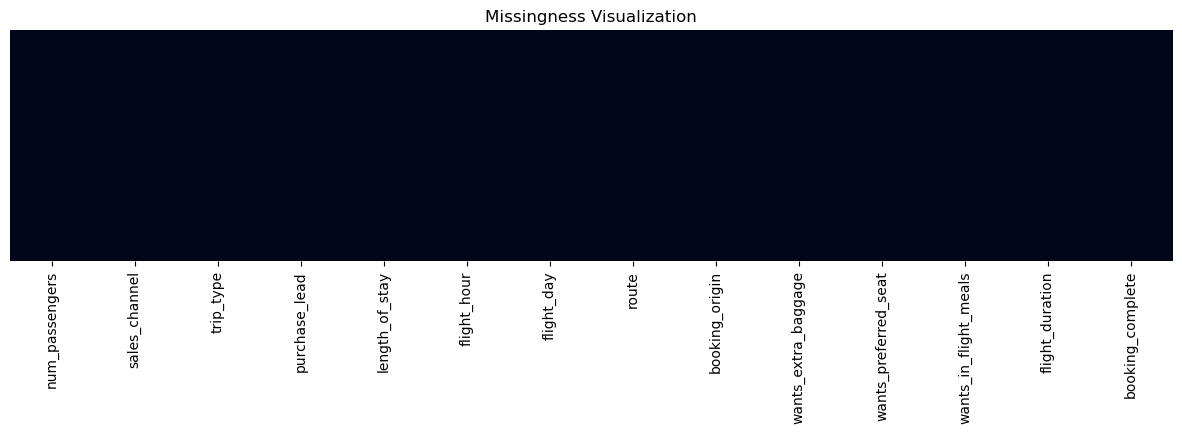

In [87]:
plot_missingness(data)

- No missingness within our dataframe.

In [5]:
def separate_df(dataframe):
    num_df = data.select_dtypes(include=['number'])
    cat_df = data.select_dtypes(exclude=['number'])
    return num_df, cat_df

In [6]:
num_df, cat_df = separate_df(data)

In [7]:
print(f"Numerical Dataframe : {num_df.shape}")
print(f"Categorical Dataframe : {cat_df.shape}")

Numerical Dataframe : (50000, 9)
Categorical Dataframe : (50000, 5)


In [35]:
num_df.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,262,19,7,1,0,0,5.52,0
1,1,112,20,3,0,0,0,5.52,0
2,2,243,22,17,1,1,0,5.52,0
3,1,96,31,4,0,0,1,5.52,0
4,2,68,22,15,1,0,1,5.52,0


In [47]:
num_df.nunique()

num_passengers             9
purchase_lead            470
length_of_stay           335
flight_hour               24
wants_extra_baggage        2
wants_preferred_seat       2
wants_in_flight_meals      2
flight_duration           21
booking_complete           2
dtype: int64

In [50]:
num_df['wants_extra_baggage'].value_counts()

wants_extra_baggage
1    33439
0    16561
Name: count, dtype: int64

In [53]:
num_df['wants_preferred_seat'].value_counts()

wants_preferred_seat
0    35152
1    14848
Name: count, dtype: int64

In [54]:
num_df['wants_in_flight_meals'].value_counts()

wants_in_flight_meals
0    28643
1    21357
Name: count, dtype: int64

- It appears some of our numerical features are binary features with only 2 distinct values representing 'presence' and 'absence'

In [36]:
cat_df.head()

,sales_channel,trip_type,flight_day,route,booking_origin
0,Internet,RoundTrip,Sat,AKLDEL,New Zealand
1,Internet,RoundTrip,Sat,AKLDEL,New Zealand
2,Internet,RoundTrip,Wed,AKLDEL,India
3,Internet,RoundTrip,Sat,AKLDEL,New Zealand
4,Internet,RoundTrip,Wed,AKLDEL,India


In [49]:
cat_df.nunique()

sales_channel       2
trip_type           3
flight_day          7
route             799
booking_origin    104
dtype: int64

- It appears some features have very high cardinality i.e 'route' and 'booking_origin'. 
- This will inform us when it comes to encoding this features.

In [45]:
def plot_boxplots(data):
    num_cols = len(data.columns)
    num_rows = (num_cols + 2) // 3  # Calculate the number of rows needed

    fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows * 4))  # Create subplots

    for i, column in enumerate(data.columns):
        ax = axes[i // 3, i % 3] if num_rows > 1 else axes[i % 3]
        sns.boxplot(x=data[column], ax=ax)
        sns.stripplot(x=data[column], color='magenta', size=1, ax=ax)
        ax.set_title(f'Boxplot of {column}')  # Set the title

    plt.tight_layout()  
    plt.show()  


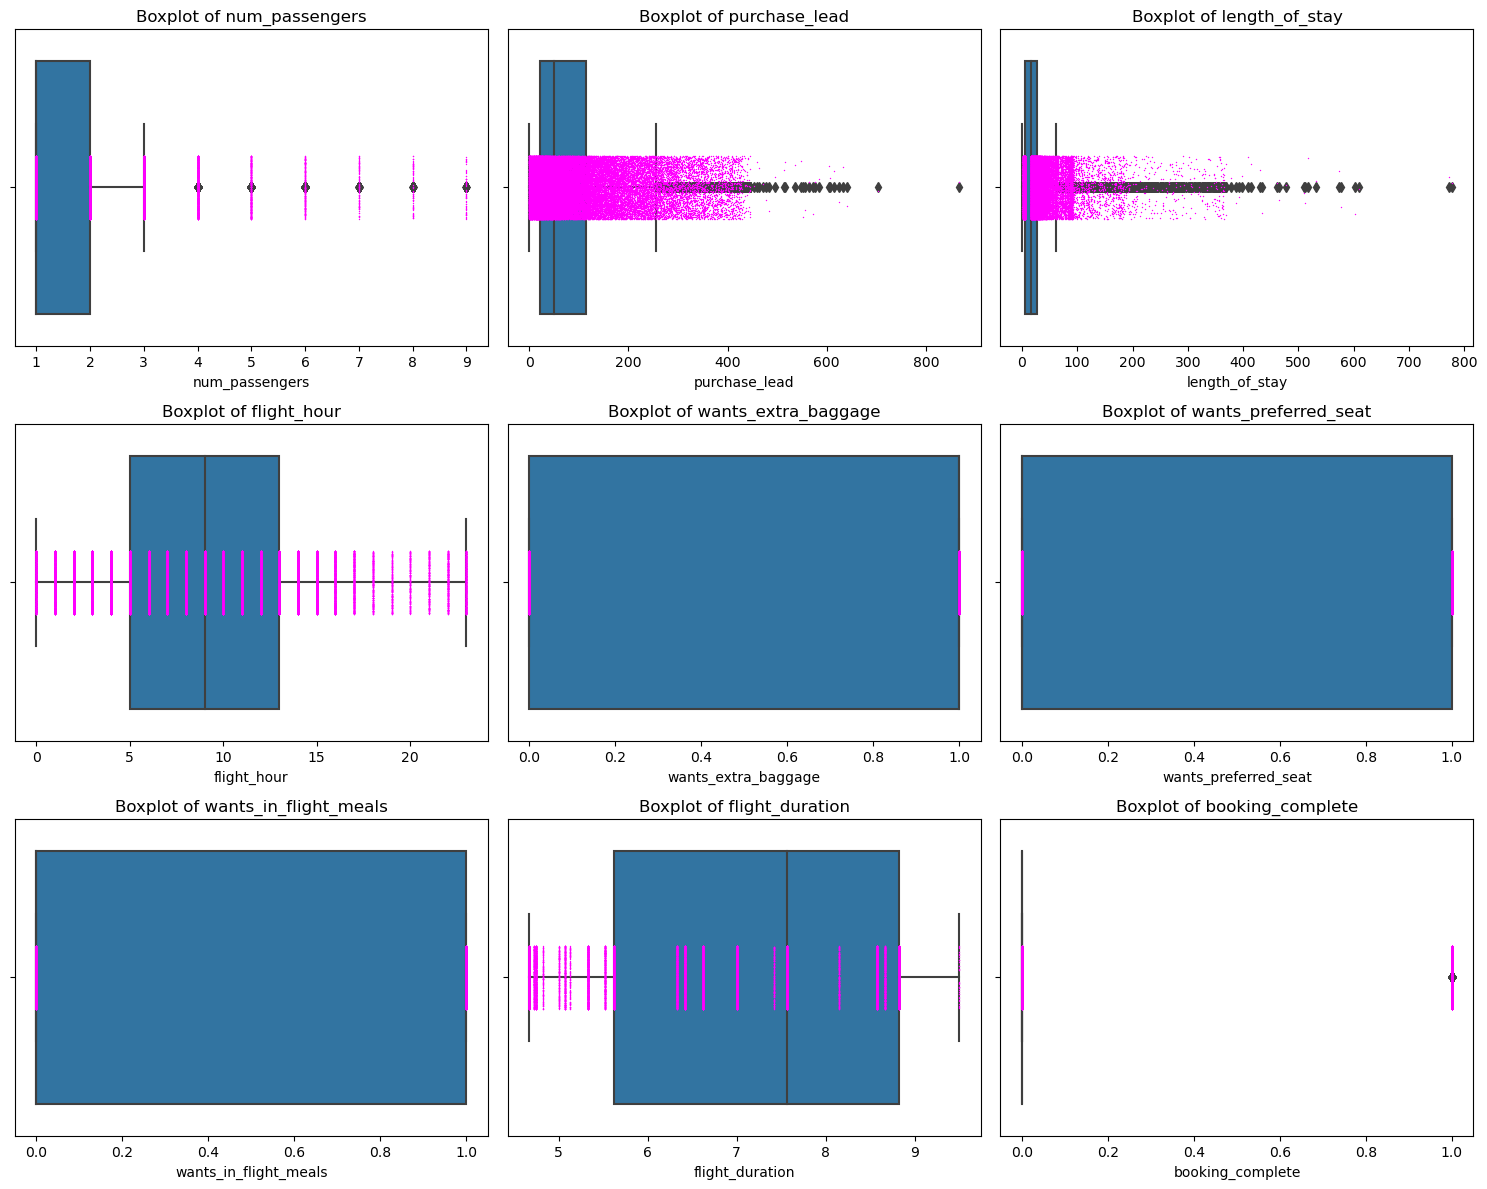

In [46]:
plot_boxplots(num_df)

- We have outliers present in some of our features. 

In [55]:
def plot_kdeplots(data):
    num_cols = len(data.columns)
    num_rows = (num_cols + 2) // 3  # Calculate the number of rows needed

    fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows * 4))  # Create subplots

    for i, column in enumerate(data.columns):
        ax = axes[i // 3, i % 3] if num_rows > 1 else axes[i % 3]  # Select subplot
        sns.histplot(data[column], ax=ax,kde=True)  # Plot boxplot for the column
        ax.set_title(f'Distribution of {column}')  # Set the title

    plt.tight_layout()  # Adjust layout
    plt.show()  # Show the plots

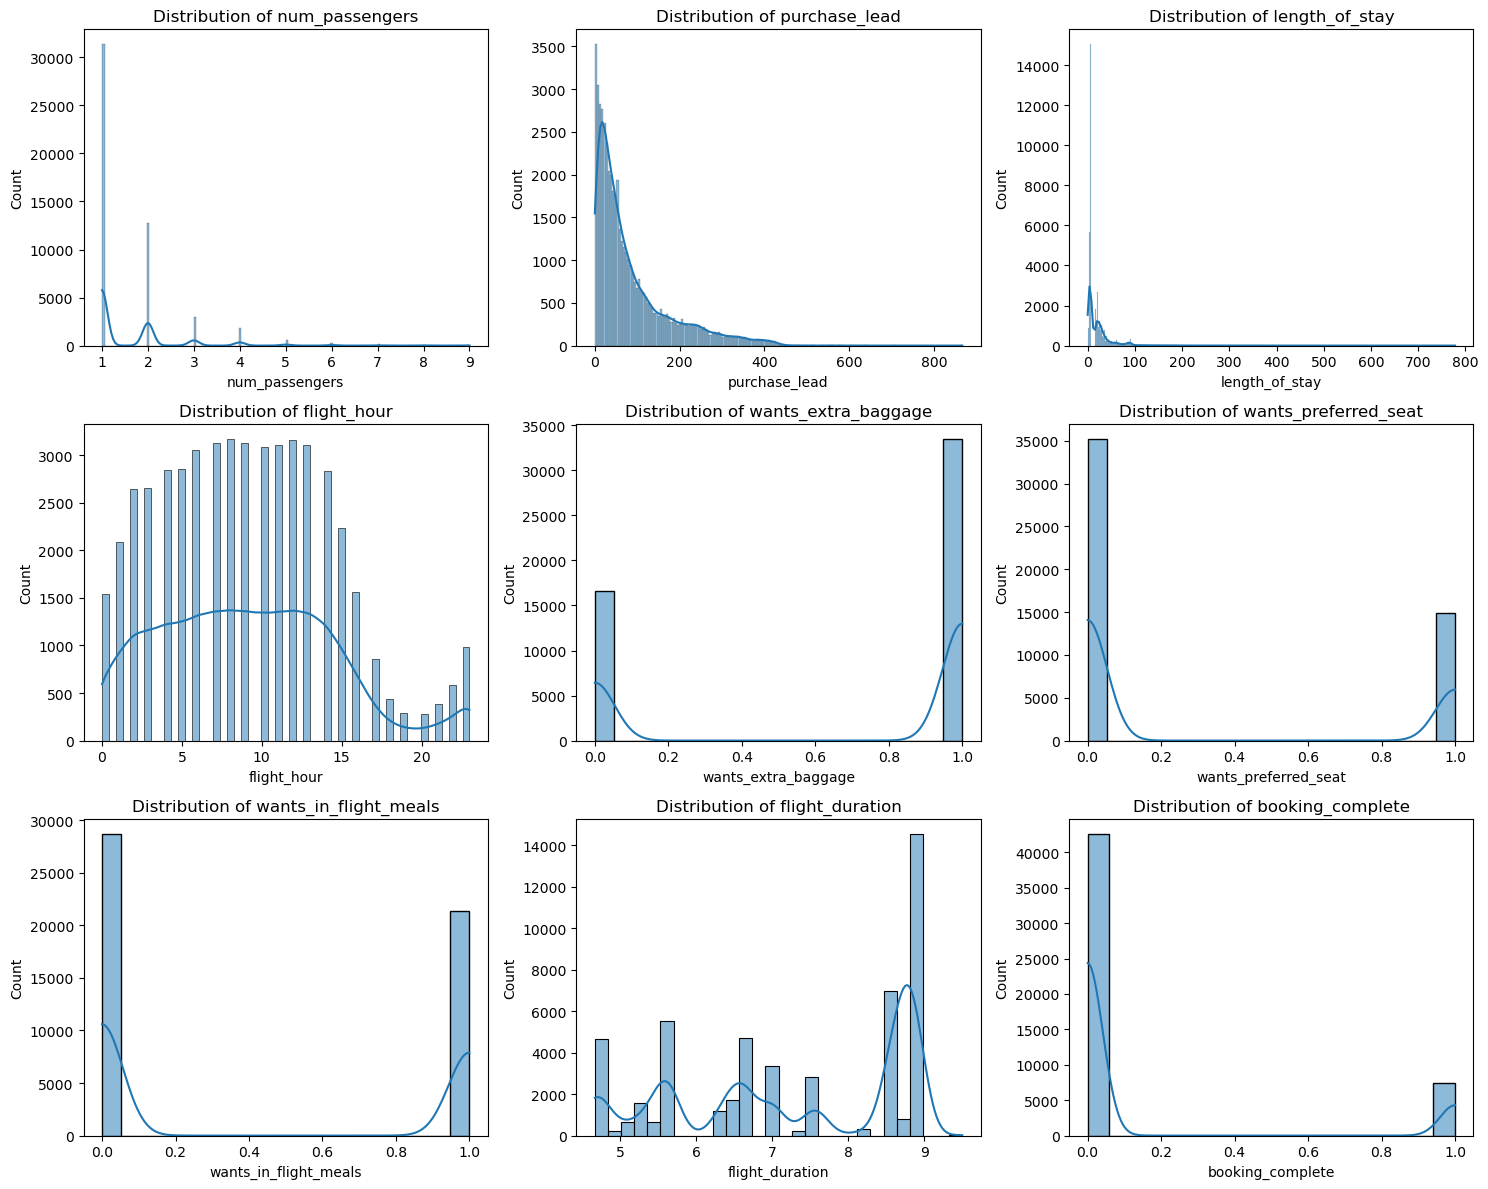

In [56]:
plot_kdeplots(num_df)


Findings: 
- We have some skew in some numerical variables that we'll look into.
- Some numerical variables have distinct values. We'll keep this in mind during feature engineering and manipulate while evaluating performance.

# Bivariate Analysis

In [57]:
data['num_passengers'].value_counts()

num_passengers
1    31352
2    12804
3     2941
4     1784
5      561
6      289
7      114
8       89
9       66
Name: count, dtype: int64

In [92]:
data.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [88]:
def plot_boxplots_numerical_vs_target(data, target_column='booking_complete', num_cols=3, figsize=(30, 25)):
    numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
    num_rows = (len(numerical_columns) + num_cols - 1) // num_cols

    plt.figure(figsize=figsize)
    for i, num_col in enumerate(numerical_columns, 1):
        plt.subplot(num_rows, num_cols, i)
        sns.boxplot(x=target_column, y=num_col, data=data)
        plt.title(f'{num_col} vs. {target_column}')
        plt.xlabel(target_column)
        plt.ylabel(num_col)

    plt.tight_layout()
    plt.show()


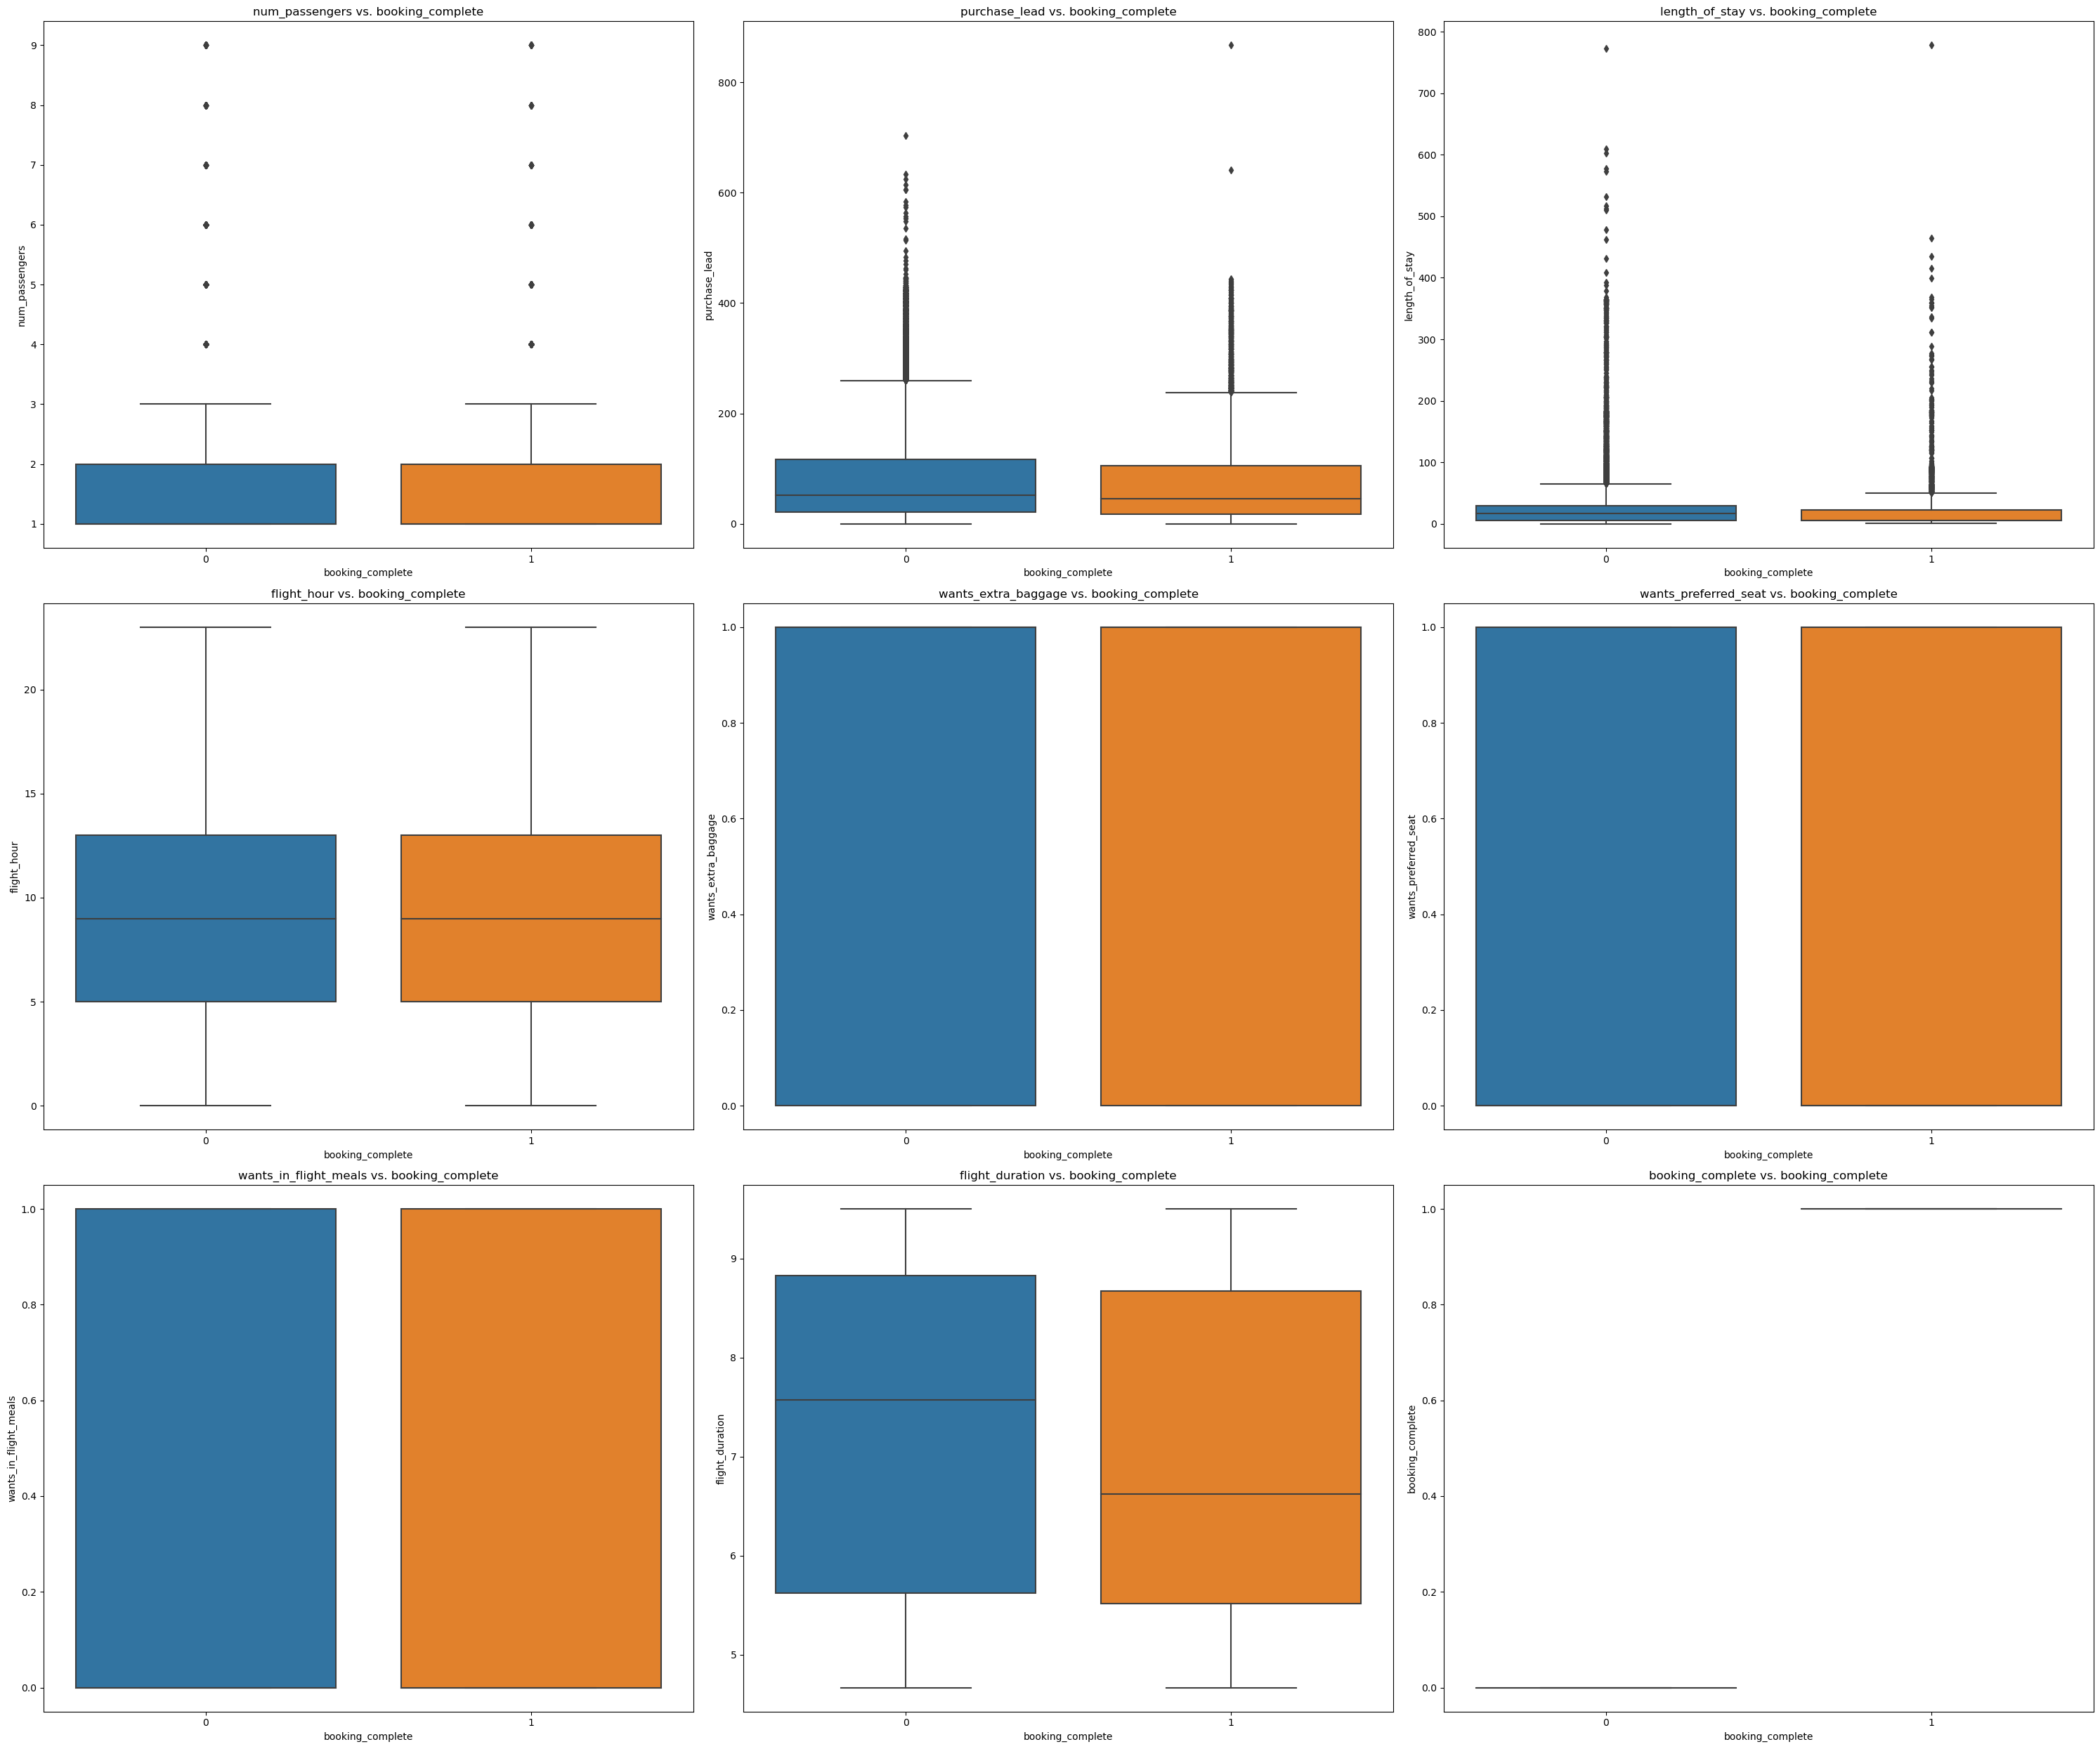

In [89]:
plot_boxplots_numerical_vs_target(data)

- No much difference noted within the groups other than the median flight_duration being slighlty higher in booking_complete[0] than [1].

In [91]:
def plot_kdeplots_numerical_vs_target(data, target_column='booking_complete', num_cols=3, figsize=(30, 25)):
    numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
    num_rows = (len(numerical_columns) + num_cols - 1) // num_cols

    plt.figure(figsize=figsize)
    for i, num_col in enumerate(numerical_columns, 1):
        plt.subplot(num_rows, num_cols, i)
        sns.kdeplot(data=data, x=num_col, hue=target_column, fill=True, alpha=0.5)
        plt.title(f'{num_col} vs. {target_column}')
        plt.xlabel(target_column)
        plt.ylabel(num_col)

    plt.tight_layout()
    plt.show()


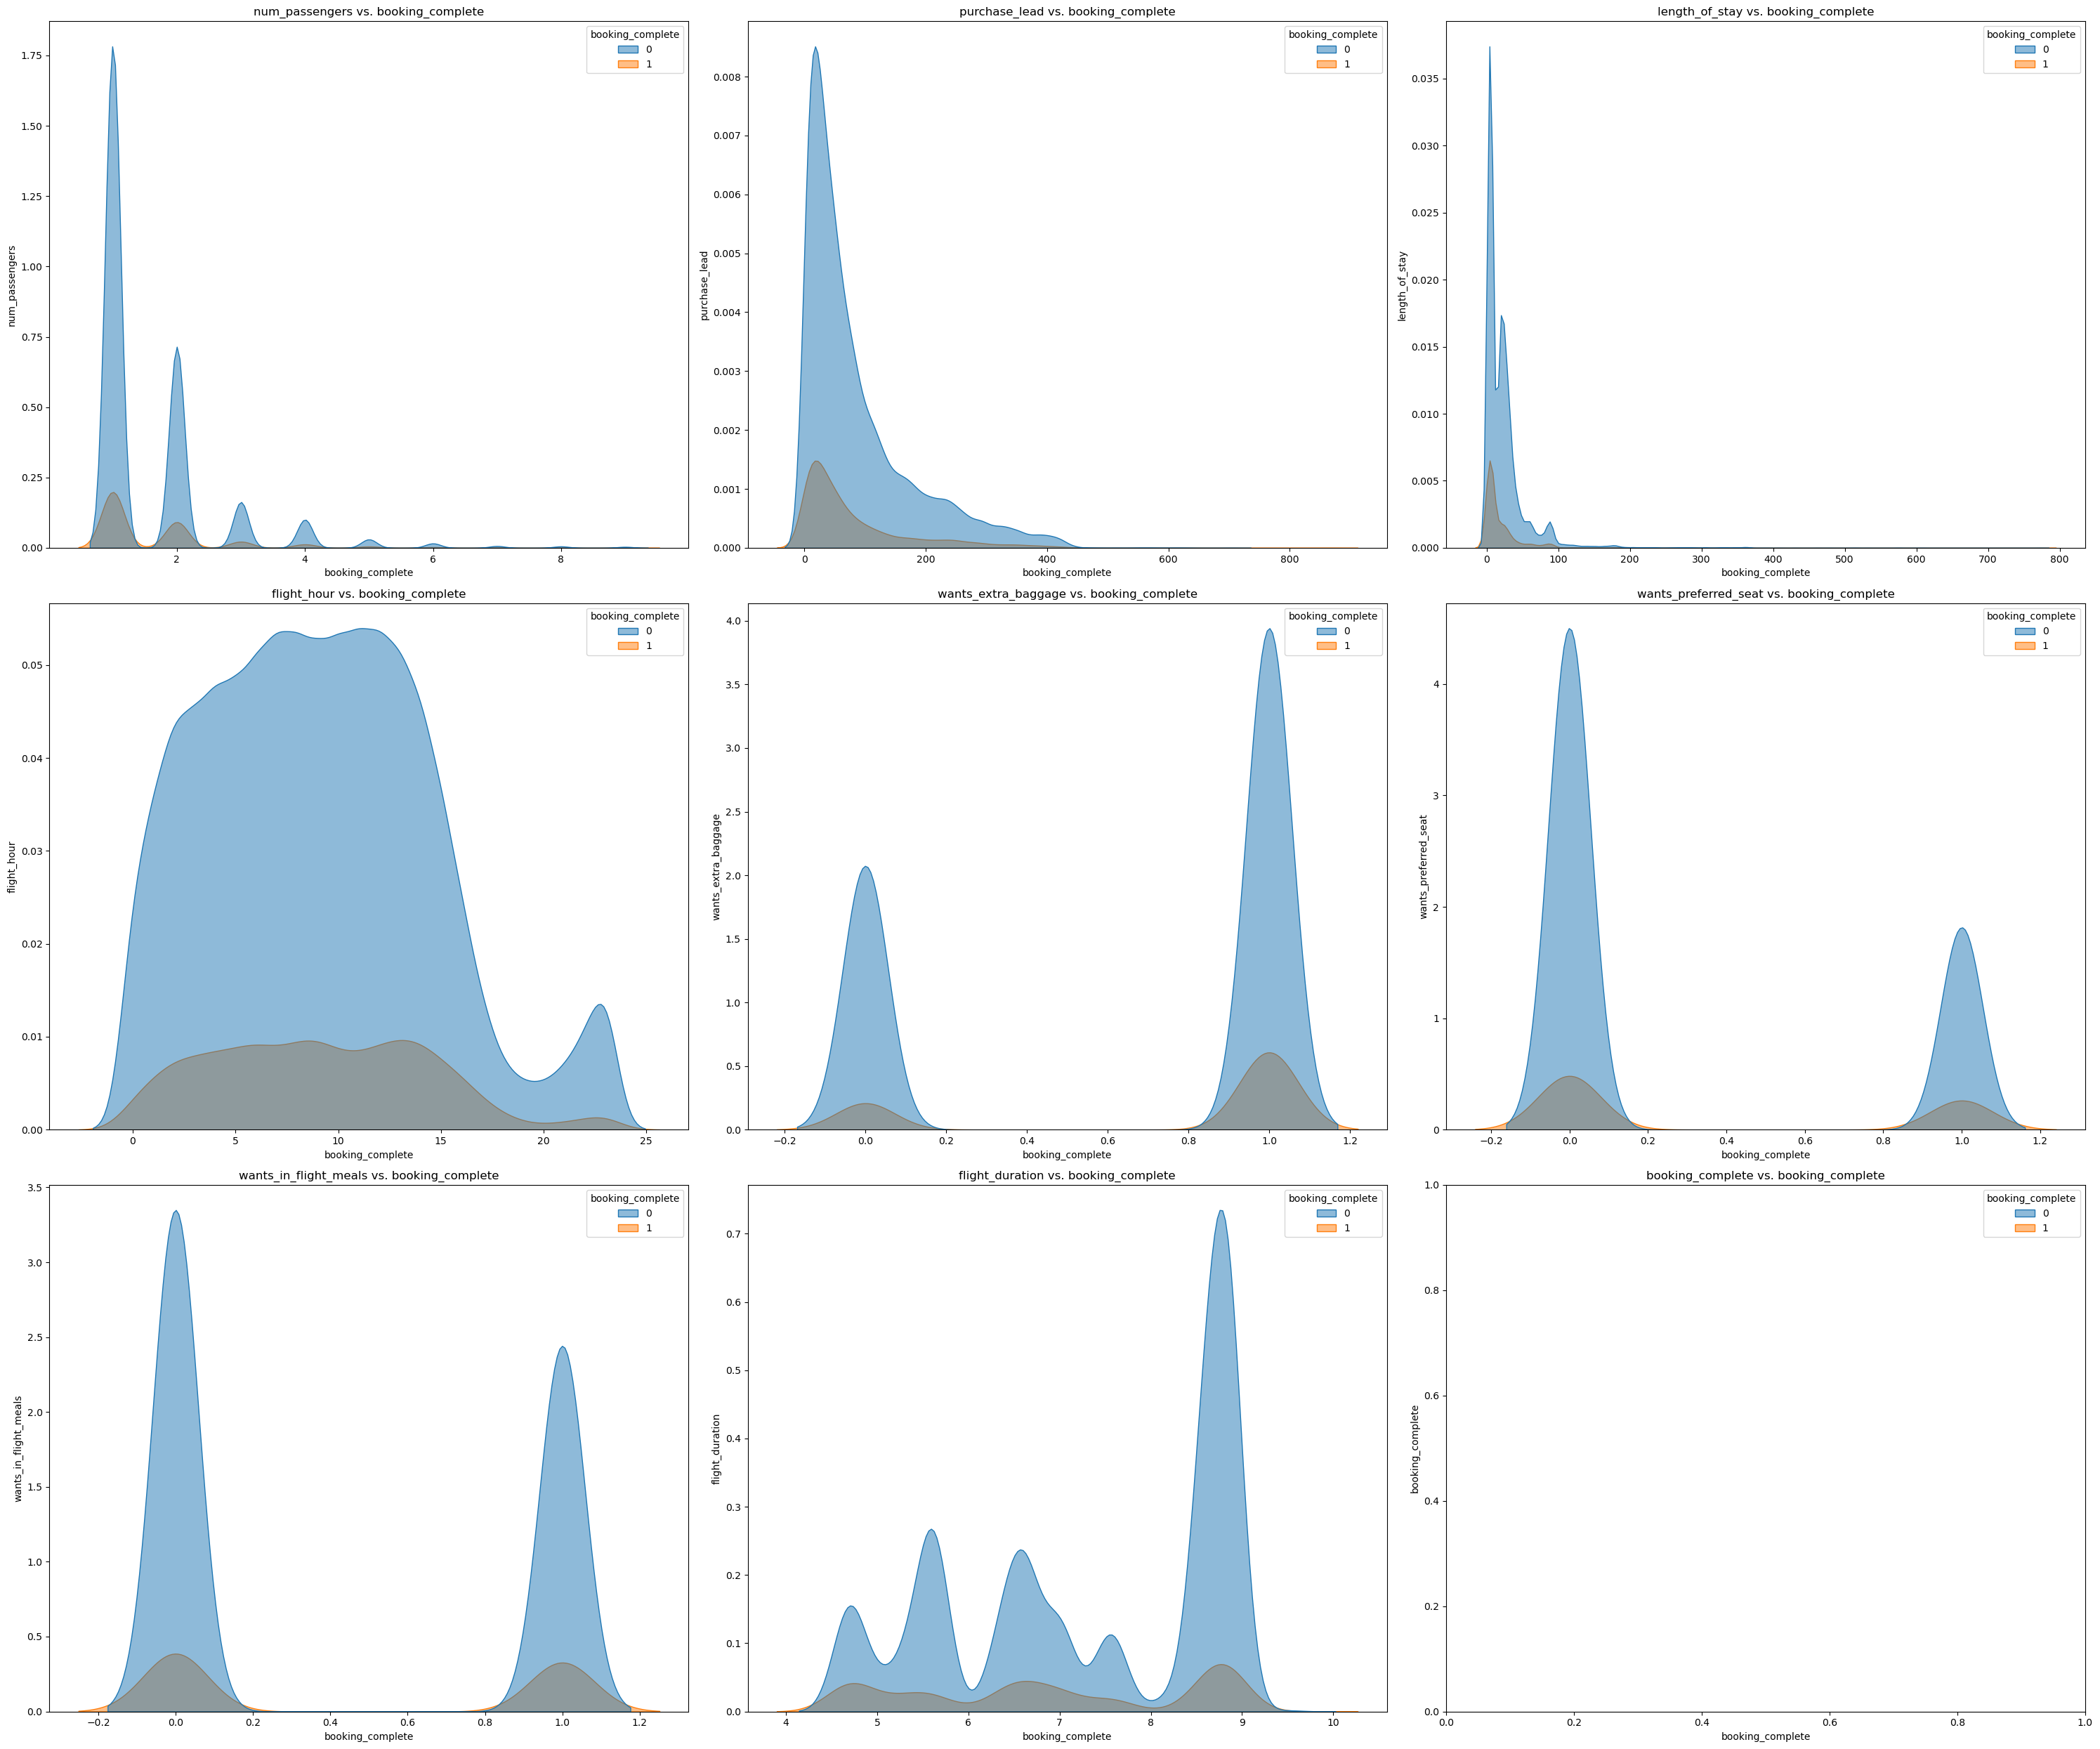

In [92]:
plot_kdeplots_numerical_vs_target(data)

- Frequency distributions shapes seem to be the same in both classes.
- Almost similar distribution numbers in flight duration or 6 and 8 hours

In [94]:
def plot_countplots_categorical_vs_target(data, target_column='booking_complete', num_cols=3, figsize=(30, 25)):
    categorical_columns = data.select_dtypes(include=['object', 'category']).columns.tolist()
    num_rows_cat = (len(categorical_columns) + num_cols - 1) // num_cols

    plt.figure(figsize=figsize)
    for i, cat_col in enumerate(categorical_columns, 1):
        plt.subplot(num_rows_cat, num_cols, i)
        sns.countplot(x=cat_col, hue=target_column, data=data)
        plt.title(f'{cat_col} vs. {target_column}')
        plt.xlabel(cat_col)
        plt.ylabel('Count')
        plt.legend(title=target_column, loc='upper right')

    plt.tight_layout()
    plt.show()



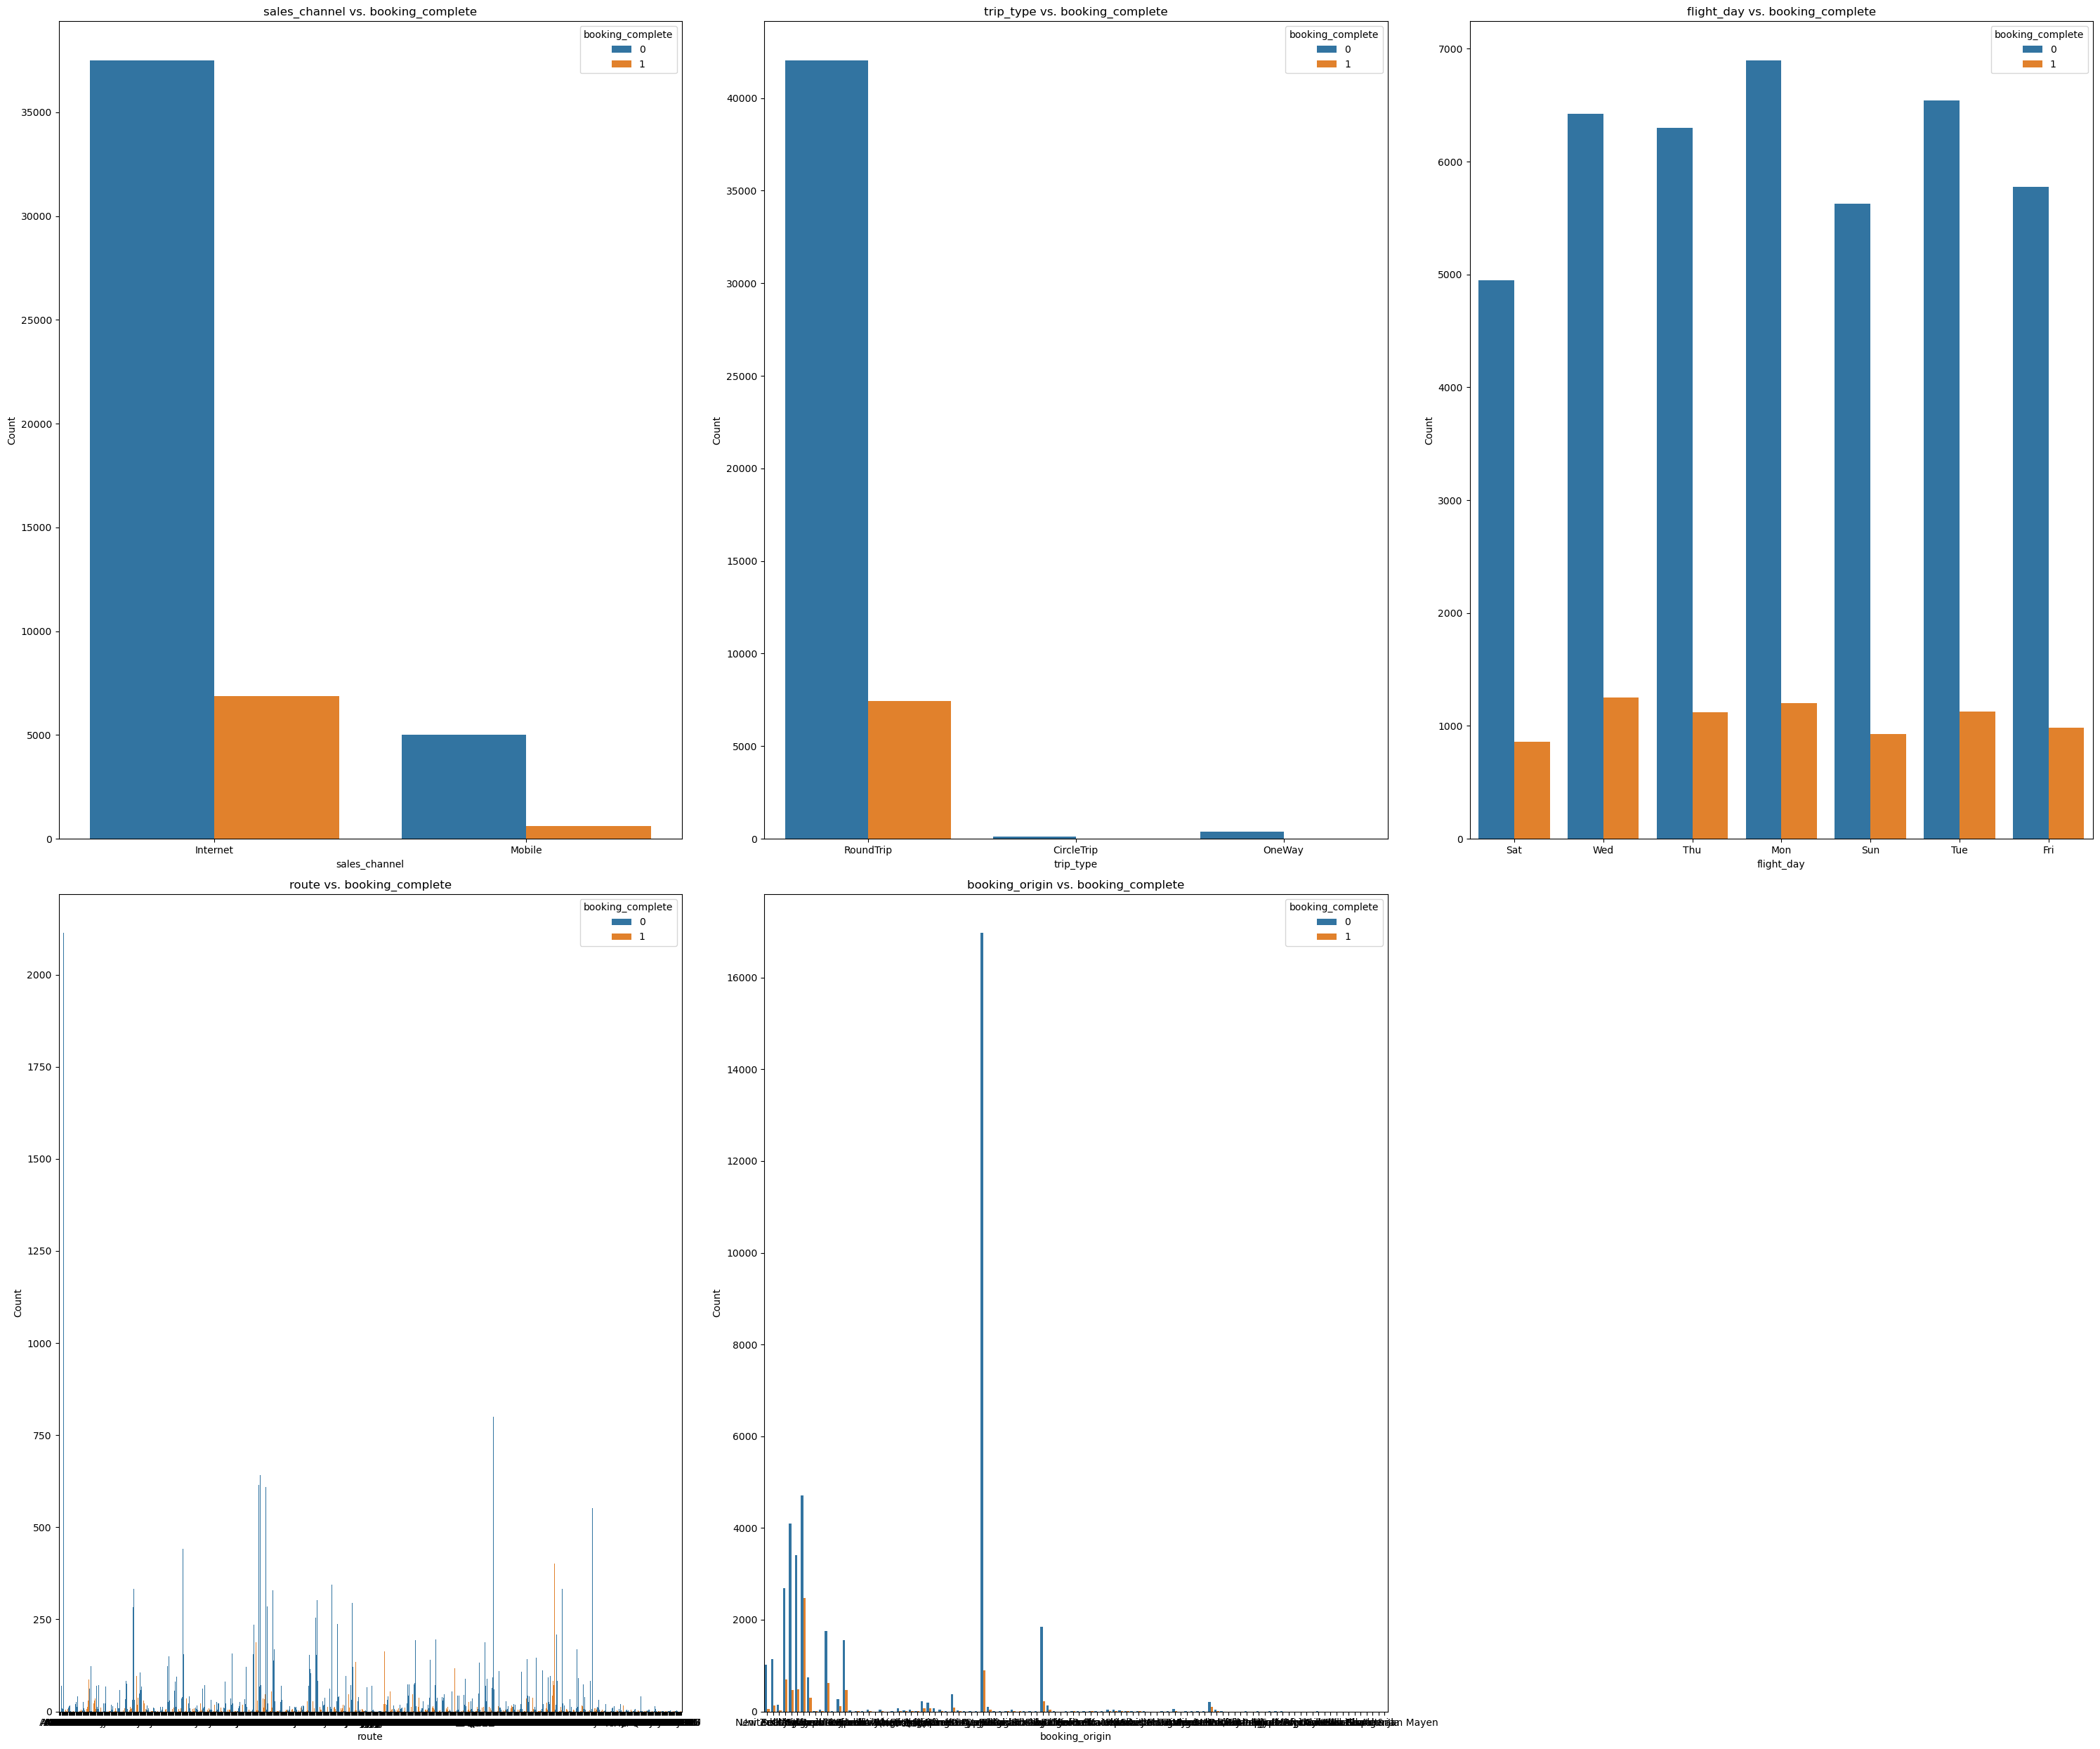

In [95]:
plot_countplots_categorical_vs_target(data)

In [106]:
data['route'].value_counts()

route
AKLKUL    2680
PENTPE     924
MELSGN     842
ICNSIN     801
DMKKIX     744
          ... 
LBUTPE       1
CXRMEL       1
DELKBR       1
KOSSYD       1
MRUXIY       1
Name: count, Length: 799, dtype: int64

### Let's handle the skew in "purchase_lead" and "length_of_stay" 

In [8]:
columns_to_transform = ['length_of_stay','purchase_lead','flight_duration']

for col in columns_to_transform:
    data[f"log_{col}"] = np.log(data[col] + 1)

In [9]:
data.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,log_length_of_stay,log_purchase_lead,log_flight_duration
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0,2.995732,5.572154,1.874874
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0,3.044522,4.727388,1.874874
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0,3.135494,5.497168,1.874874
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0,3.465736,4.574711,1.874874
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0,3.135494,4.234107,1.874874


In [63]:
data.shape

(50000, 17)

- Visualizing the transformed features.

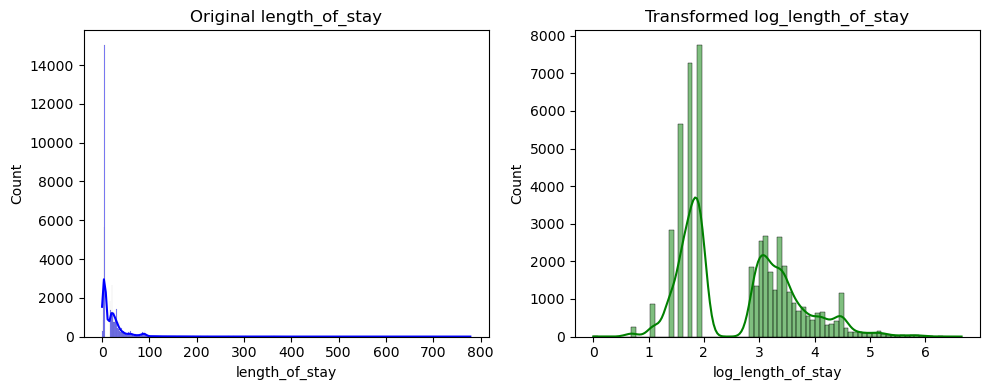

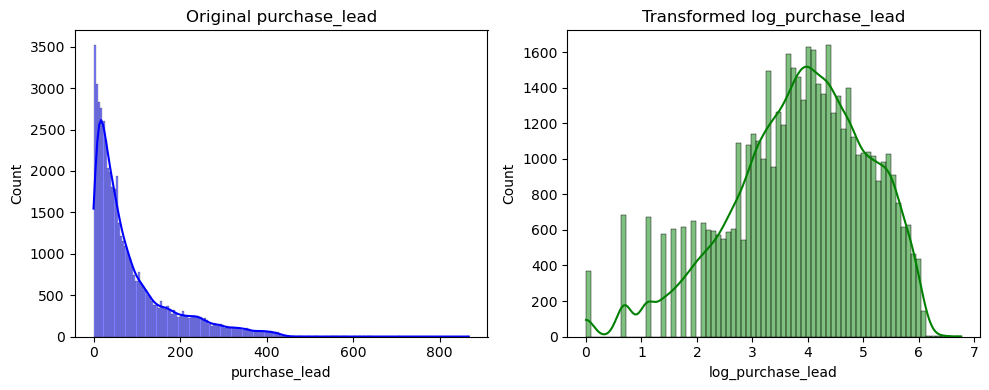

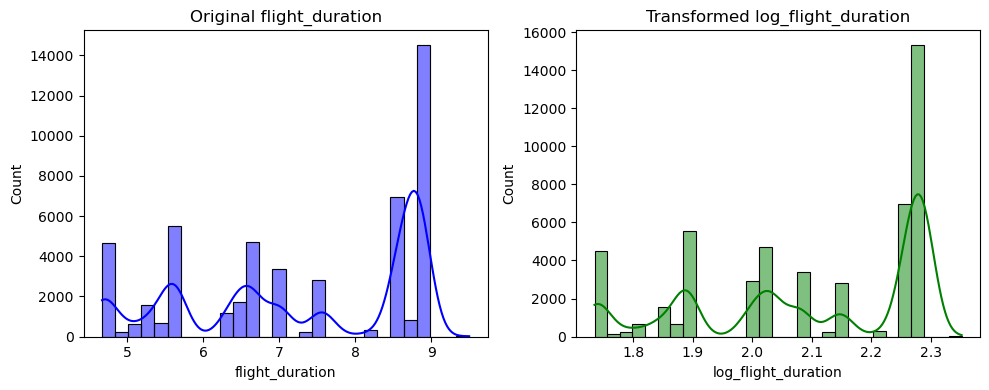

In [10]:
for col in columns_to_transform:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(data[col], kde=True, color='blue')
    plt.title(f'Original {col}')

    plt.subplot(1, 2, 2)
    sns.histplot(data[f'log_{col}'], kde=True, color='green')
    plt.title(f'Transformed log_{col}')

    plt.tight_layout()
    plt.show()

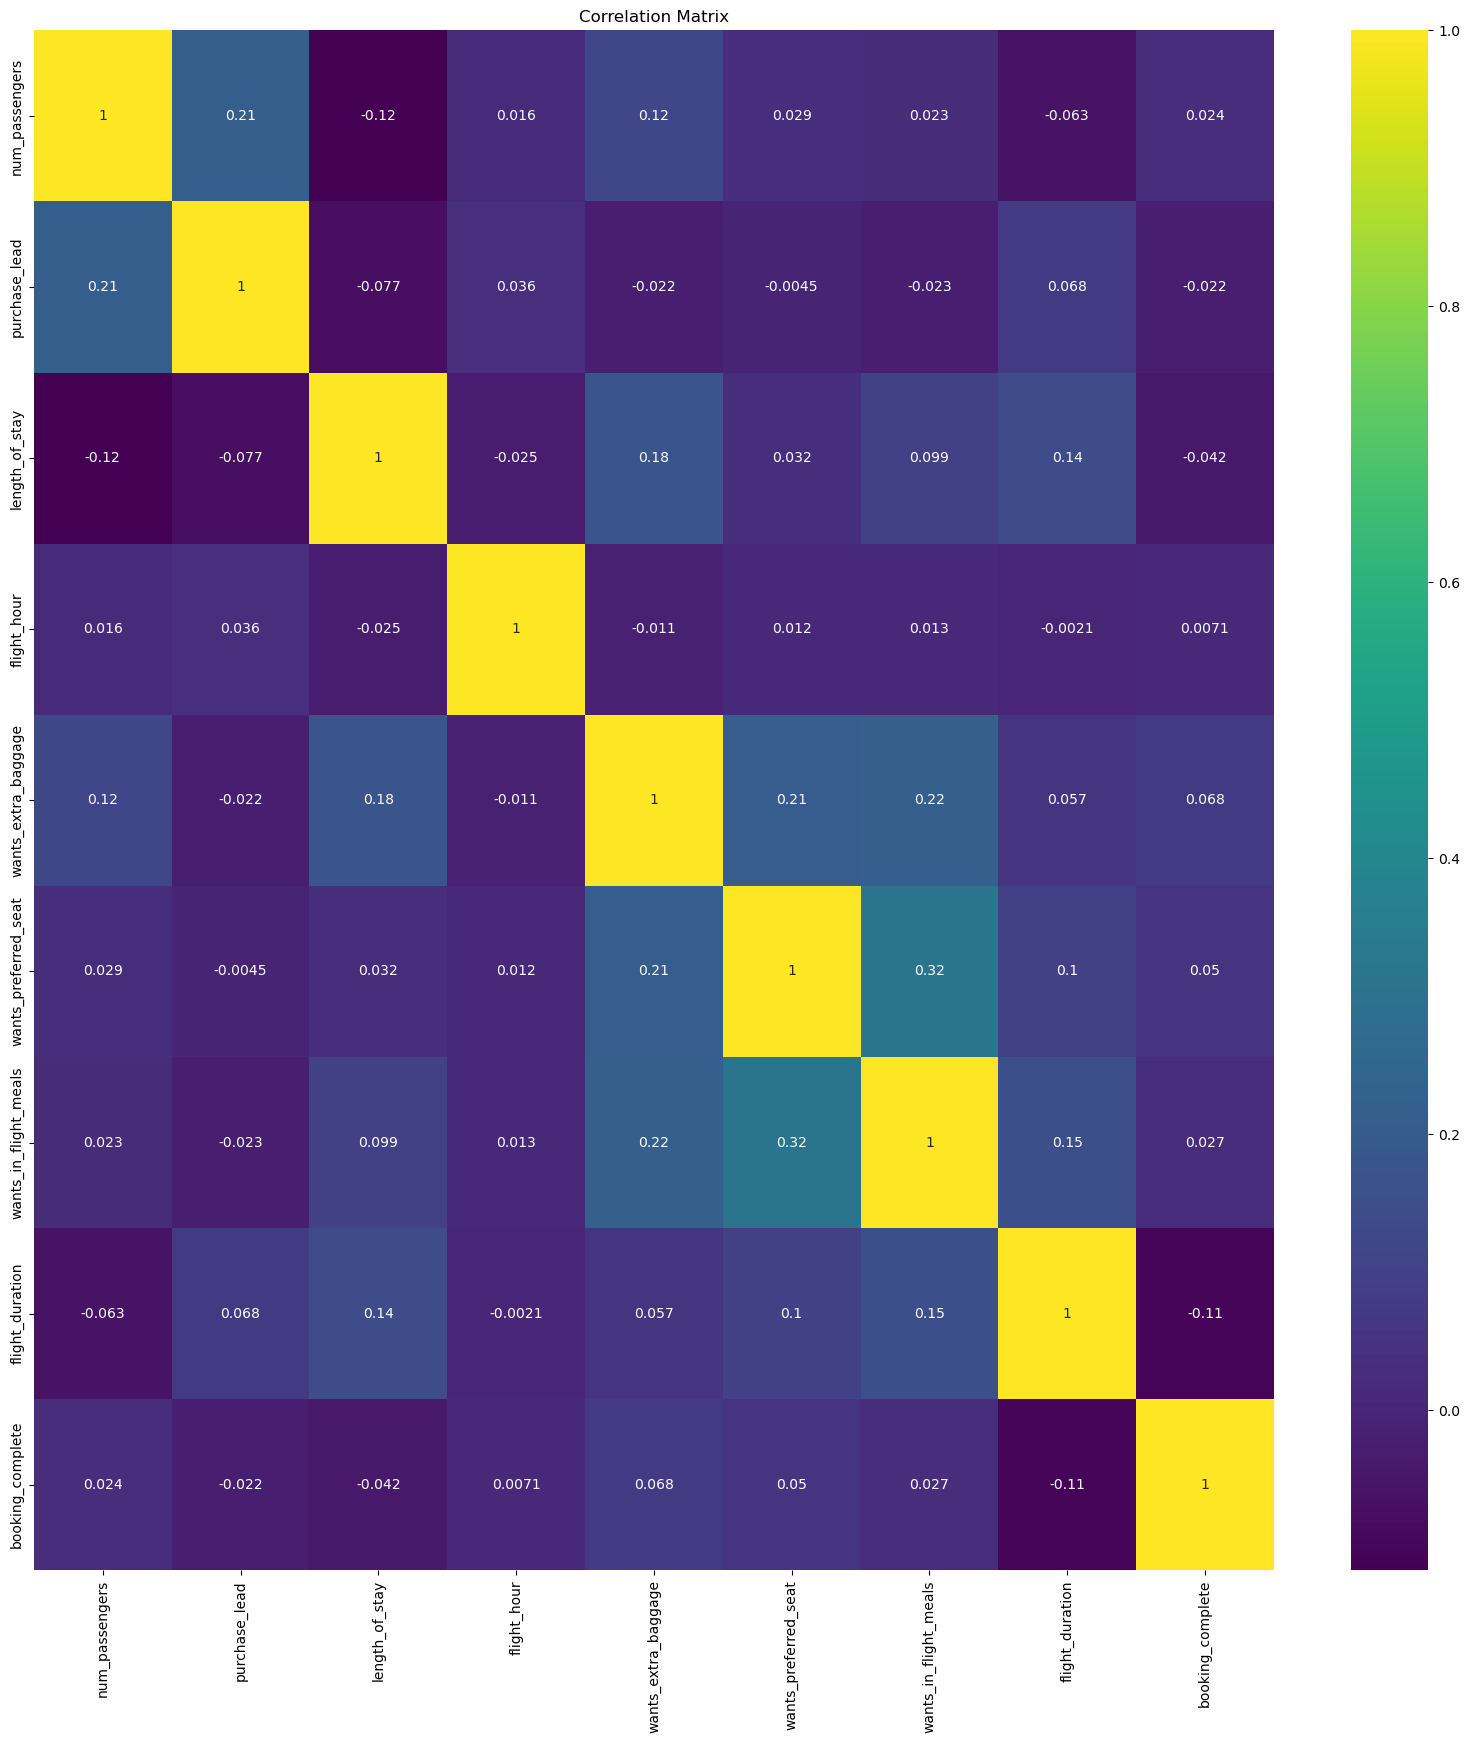

In [11]:
corr_mat =df.select_dtypes(include=['number']).corr()
plt.figure(figsize=(20,20))
g=sns.heatmap(corr_mat,annot=True,cmap="viridis")
plt.title("Correlation Matrix")
plt.show()

- Many relationships appear to be fairly weak, indicating a non-linear relationship.
- Biggest correlation with the target variable is 'flight_duration'.
- Majority if correlations are positive.

## Target Variable

In [65]:
data['booking_complete'].value_counts(normalize=True)*100

booking_complete
0    85.044
1    14.956
Name: proportion, dtype: float64

- We clearly have a class imbalance.

In [55]:
cat_df.head()

,sales_channel,trip_type,flight_day,route,booking_origin
0,Internet,RoundTrip,Sat,AKLDEL,New Zealand
1,Internet,RoundTrip,Sat,AKLDEL,New Zealand
2,Internet,RoundTrip,Wed,AKLDEL,India
3,Internet,RoundTrip,Sat,AKLDEL,New Zealand
4,Internet,RoundTrip,Wed,AKLDEL,India


# One Hot Encoding

In [13]:
from sklearn.preprocessing import OneHotEncoder

In [14]:
def separate_dataframe(data):
  num_df = data.select_dtypes(include=['number'])
  cat_df = data.select_dtypes(exclude=['number'])

  return num_df,cat_df

In [114]:
data.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete',
       'log_length_of_stay', 'log_purchase_lead', 'log_flight_duration'],
      dtype='object')

In [15]:
X = data.drop(columns=['booking_complete','length_of_stay','purchase_lead','flight_duration'])
y = data['booking_complete']

In [16]:
print(X.shape)
print(y.shape)

(50000, 13)
(50000,)


In [82]:
X.head()

,num_passengers,sales_channel,trip_type,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,log_length_of_stay,log_purchase_lead,log_flight_duration
0,2,Internet,RoundTrip,7,Sat,AKLDEL,New Zealand,1,0,0,2.995732,5.572154,1.874874
1,1,Internet,RoundTrip,3,Sat,AKLDEL,New Zealand,0,0,0,3.044522,4.727388,1.874874
2,2,Internet,RoundTrip,17,Wed,AKLDEL,India,1,1,0,3.135494,5.497168,1.874874
3,1,Internet,RoundTrip,4,Sat,AKLDEL,New Zealand,0,0,1,3.465736,4.574711,1.874874
4,2,Internet,RoundTrip,15,Wed,AKLDEL,India,1,0,1,3.135494,4.234107,1.874874


In [83]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: booking_complete, dtype: int64

In [17]:
numerical_df,categorical_df = separate_dataframe(X)

In [18]:
numerical_df.shape

(50000, 8)

In [19]:
categorical_df.shape

(50000, 5)

In [20]:
enc = OneHotEncoder(handle_unknown='ignore')
enc_df = enc.fit_transform(categorical_df)

In [21]:
enc_array = enc_df.toarray()
enc_df = pd.DataFrame(enc_array,columns=enc.get_feature_names_out())
enc_df.dtypes.value_counts()

float64    915
Name: count, dtype: int64

Standardizing the numerous variables

In [76]:
num_df.shape

(50000, 9)

In [25]:
numerical_df.head()

,num_passengers,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,log_length_of_stay,log_purchase_lead,log_flight_duration
0,2,7,1,0,0,2.995732,5.572154,1.874874
1,1,3,0,0,0,3.044522,4.727388,1.874874
2,2,17,1,1,0,3.135494,5.497168,1.874874
3,1,4,0,0,1,3.465736,4.574711,1.874874
4,2,15,1,0,1,3.135494,4.234107,1.874874


In [102]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(numerical_df)
scaled_df = pd.DataFrame(scaled_df,columns=scaler.get_feature_names_out())

In [103]:
print(scaled_df.shape)
scaled_df.head()

(50000, 8)


,num_passengers,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,log_length_of_stay,log_purchase_lead,log_flight_duration
0,0.400684,-0.381764,0.703747,-0.649919,-0.863497,0.364641,1.397979,-1.157825
1,-0.579559,-1.120780,-1.420965,-0.649919,-0.863497,0.413170,0.712500,-1.157825
2,0.400684,1.465775,0.703747,1.538654,-0.863497,0.503656,1.337132,-1.157825
3,-0.579559,-0.936026,-1.420965,-0.649919,1.158082,0.832133,0.588612,-1.157825
4,0.400684,1.096267,0.703747,-0.649919,1.158082,0.503656,0.312231,-1.157825


In [104]:
final_df = pd.concat([scaled_df,enc_df],axis=1)
final_df.shape

(50000, 923)

In [105]:
final_df.head()

,num_passengers,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,log_length_of_stay,log_purchase_lead,log_flight_duration,sales_channel_Internet,sales_channel_Mobile,...,booking_origin_Timor-Leste,booking_origin_Tonga,booking_origin_Tunisia,booking_origin_Turkey,booking_origin_Ukraine,booking_origin_United Arab Emirates,booking_origin_United Kingdom,booking_origin_United States,booking_origin_Vanuatu,booking_origin_Vietnam
0,0.400684,-0.381764,0.703747,-0.649919,-0.863497,0.364641,1.397979,-1.157825,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.579559,-1.120780,-1.420965,-0.649919,-0.863497,0.413170,0.712500,-1.157825,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.400684,1.465775,0.703747,1.538654,-0.863497,0.503656,1.337132,-1.157825,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.579559,-0.936026,-1.420965,-0.649919,1.158082,0.832133,0.588612,-1.157825,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.400684,1.096267,0.703747,-0.649919,1.158082,0.503656,0.312231,-1.157825,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Dimensionality Reduction

In [107]:
pca = PCA()
X_pca = pca.fit_transform(final_df)

In [108]:
exp_var_ratio = pca.explained_variance_ratio_
cum_var_ratio = exp_var_ratio.cumsum()

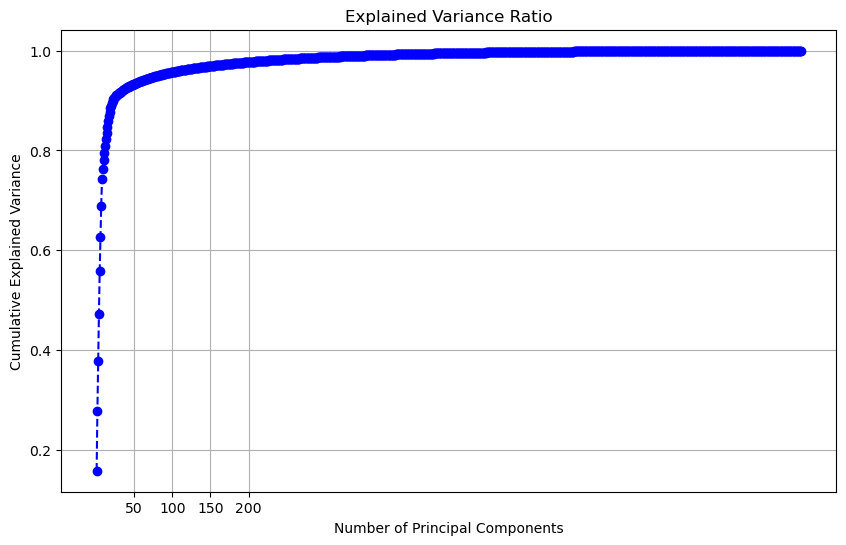

In [109]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(exp_var_ratio) + 1), cum_var_ratio, marker='o', linestyle='--', color='b')
plt.title('Explained Variance Ratio')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.xticks([50, 100, 150, 200])
plt.show()


In [110]:
num_components = 50
pca = PCA(n_components=num_components)
X_pca = pca.fit_transform(final_df)

In [112]:
# Create a new DataFrame with PCA components
columns_pca = [f'PC{i+1}' for i in range(num_components)]
df_pca = pd.DataFrame(data=X_pca, columns=columns_pca)

In [113]:
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50
0,-0.556025,0.925195,-0.770898,1.366927,0.815727,-1.063937,-0.116598,-0.157314,0.023298,-0.058373,...,0.010281,-0.156352,-0.011185,0.015163,0.000538,-0.067358,-0.032545,0.032068,-0.022494,-0.061025
1,-1.593624,-0.551023,-0.548681,0.877299,-0.508098,-1.401147,0.313743,0.774701,0.155746,-0.134411,...,0.010461,-0.159263,-0.012480,0.017002,0.000691,-0.064727,-0.035801,0.032212,-0.018550,-0.065843
2,0.413037,1.577713,0.079229,-0.467378,1.463408,-1.407276,-1.346783,0.730638,-0.005390,-0.249085,...,0.004950,-0.026725,0.029278,0.005707,0.011244,-0.001759,-0.014482,0.011608,-0.007111,-0.010086
3,-0.419787,-0.546242,-0.044330,0.470545,-0.584000,-1.418407,1.889709,0.865132,0.261385,-0.123864,...,0.010478,-0.155288,-0.007331,0.008480,0.001883,-0.070962,-0.036623,0.033992,-0.017620,-0.062959
4,0.403124,0.778736,0.313516,-0.067306,1.588010,-0.326882,1.376481,-0.037756,0.053799,-0.169064,...,0.006731,-0.017871,0.034391,-0.005611,0.014275,-0.003780,-0.012383,0.012475,-0.005205,-0.010923


Modelling

In [115]:
X_train, X_test, y_train, y_test = train_test_split(df_pca, y, test_size=0.2, random_state=42)

In [116]:
print(X_train.shape)
print(y_train.shape)

(40000, 50)
(40000,)


In [117]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())



Cross-Validation Scores: [0.84875  0.849625 0.849875 0.841875 0.85475 ]
Mean CV Score: 0.8489749999999999


In [40]:
scores = cross_validate(rf_classifier, X_train, y_train, cv=5, scoring=['precision','recall','accuracy'])

In [41]:
for key, value in scores.items():
  print(key,value,value.mean())

fit_time [50.3074317  51.50124311 51.98136997 52.77353597 48.33141589] 50.978999328613284
score_time [0.16701436 0.16505623 0.15264344 0.16154957 0.16512394] 0.1622775077819824
test_precision [0.4495114  0.5        0.49673203 0.42524917 0.56140351] 0.48657922100048046
test_recall [0.11509591 0.117598   0.12666667 0.10666667 0.13333333] 0.11987211565193216
test_accuracy [0.84625  0.850125 0.84975  0.844375 0.854375] 0.8489749999999999


In [119]:
rf_classifier.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [120]:
y_pred = rf_classifier.predict(X_test)

In [123]:
print('ACCURACY: ',accuracy_score(y_test,y_pred)*100)
print('AUC score: ',roc_auc_score(y_test,y_pred))

ACCURACY:  85.25
AUC score:  0.5589154295140211


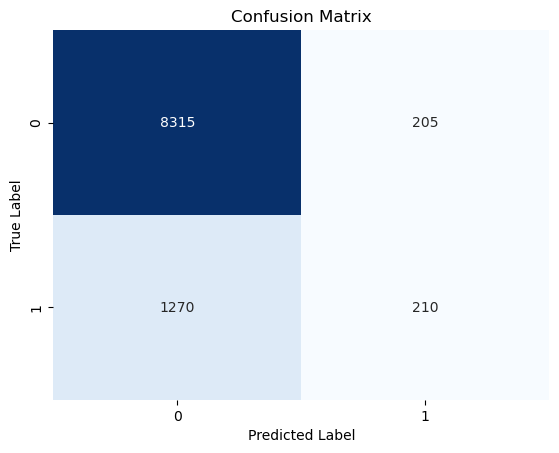

In [138]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [128]:
y_pred_proba = rf_classifier.predict_proba(X_test)[:,1]

Text(0.5, 1.0, 'Precision Recall Curve')

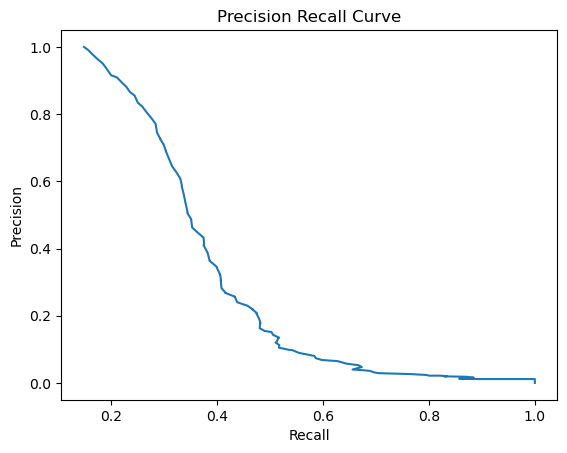

In [130]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')

# With Stratified Sampling

In [131]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(df_pca, y, test_size=0.2, random_state=42, stratify=y)
rf_classifier_2 = RandomForestClassifier(n_estimators=100, random_state=42)
scores_2 = cross_validate(rf_classifier_2,X_train_2,y_train_2,cv=5,scoring=['precision','recall','accuracy'])

In [132]:
for key, value in scores_2.items():
    print(key,value,value.mean())

fit_time [47.78155708 48.14278698 47.65343142 48.05062604 47.47845101] 47.82137050628662
score_time [0.14094996 0.13479447 0.14086938 0.15160036 0.13673353] 0.1409895420074463
test_precision [0.5130719  0.48375451 0.51140065 0.41958042 0.46308725] 0.47817894548571616
test_recall [0.1312709  0.11204013 0.1312709  0.10025063 0.11528822] 0.11802415738342512
test_accuracy [0.8515   0.849375 0.851375 0.844625 0.847625] 0.8488999999999999


In [133]:
rf_classifier_2.fit(X_train_2,y_train_2)

RandomForestClassifier(random_state=42)

In [134]:
y_pred_2 = rf_classifier_2.predict(X_test_2)

In [135]:
print('ACCURACY: ',accuracy_score(y_test_2,y_pred_2)*100)
print('AUC score: ',roc_auc_score(y_test_2,y_pred_2))

ACCURACY:  85.08
AUC score:  0.5511895000025152


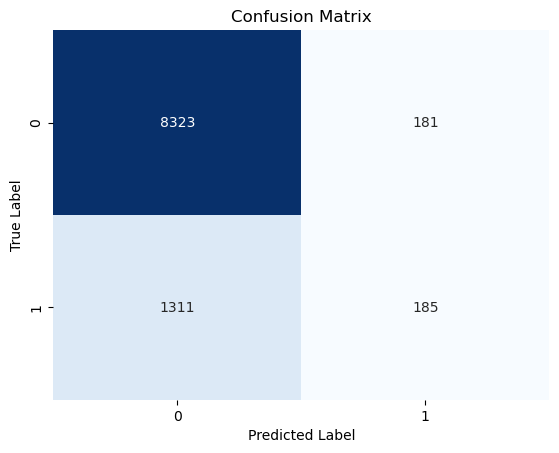

In [139]:
conf_matrix_2 = confusion_matrix(y_test_2, y_pred_2)
sns.heatmap(conf_matrix_2, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Target Encoding

In [142]:
# Load your original dataset (replace 'your_data.csv' with the actual file path)
df = pd.read_csv(r"C:\Users\user\Desktop\Projects\British_Airways_Project\Data\customer_booking.csv", encoding='latin1')

# Assume 'target' is your target variable, and 'features' contains all features
X = df.drop('booking_complete', axis=1)
y = df['booking_complete']


In [143]:
# Define preprocessing steps for numerical and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

In [144]:
categorical_df = X.select_dtypes(exclude=['int','float'])

In [145]:
categorical_df.head()

,sales_channel,trip_type,flight_day,route,booking_origin
0,Internet,RoundTrip,Sat,AKLDEL,New Zealand
1,Internet,RoundTrip,Sat,AKLDEL,New Zealand
2,Internet,RoundTrip,Wed,AKLDEL,India
3,Internet,RoundTrip,Sat,AKLDEL,New Zealand
4,Internet,RoundTrip,Wed,AKLDEL,India


### How the target encoder works

In [146]:
target_enc = TargetEncoder()
cat_target_enc = target_enc.fit_transform(categorical_df,df['booking_complete'])

In [56]:
cat_target_enc

,sales_channel,trip_type,flight_day,route,booking_origin
0,0.15477,0.150575,0.148142,0.074780,0.050279
1,0.15477,0.150575,0.148142,0.074780,0.050279
2,0.15477,0.150575,0.163148,0.074780,0.103150
3,0.15477,0.150575,0.148142,0.074780,0.050279
4,0.15477,0.150575,0.163148,0.074780,0.103150
...,...,...,...,...,...
49995,0.15477,0.150575,0.148142,0.058824,0.050358
49996,0.15477,0.150575,0.141440,0.058824,0.050358
49997,0.15477,0.150575,0.148142,0.058824,0.050358
49998,0.15477,0.150575,0.148605,0.058824,0.050358


- TargetEncoder
- Retains the same number of features.
- Compare the performances

In [147]:
numeric_features

Index(['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour',
       'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals',
       'flight_duration'],
      dtype='object')

In [148]:
categorical_features

Index(['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin'], dtype='object')

In [149]:

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('target_encoder', TargetEncoder()),  # Use TargetEncoder for non-ordinal categorical features)  # Adjust the explained variance threshold as needed
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Combine preprocessing with RandomForestClassifier in a pipeline
rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [151]:
X_train

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
11179,2,Mobile,RoundTrip,168,38,8,Tue,HANMEL,Australia,0,0,1,8.83
26739,1,Internet,RoundTrip,54,3,1,Sat,CGKICN,South Korea,0,1,0,6.62
16263,1,Internet,RoundTrip,221,17,0,Sun,KCHPER,Malaysia,1,0,1,5.62
8082,1,Internet,RoundTrip,59,36,1,Wed,DADSYD,Australia,0,0,1,8.58
39980,6,Internet,RoundTrip,49,5,10,Fri,KBVPVG,China,1,0,0,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28615,1,Internet,RoundTrip,8,3,1,Wed,MAAPER,Australia,0,0,0,5.62
30642,1,Internet,RoundTrip,16,4,12,Sun,DMKICN,South Korea,1,0,1,6.62
42175,1,Internet,RoundTrip,18,5,6,Sat,SINXIY,Australia,0,0,1,5.00
4242,1,Internet,RoundTrip,0,26,2,Thu,CGKPER,Australia,1,1,0,5.62


In [64]:
scores_3 = cross_validate(rf_model,X_train,y_train,cv=5,scoring=['precision','recall','accuracy'])

In [13]:
for key,value in scores_3.items():
    print(key,value,value.mean())

fit_time [5.85591197 5.11025786 4.38344789 4.32685399 4.39443302] 4.814180946350097
score_time [0.25575399 0.23716259 0.18365598 0.17846084 0.1722672 ] 0.2054601192474365
test_precision [0.49695122 0.50882353 0.53203343 0.51632047 0.5       ] 0.5108257299770503
test_recall [0.13628763 0.14464883 0.159699   0.14536341 0.14369256] 0.14593828495430325
test_accuracy [0.85025  0.85125  0.853375 0.85175  0.850375] 0.8513999999999999


Fitting the model to be able to confirm whether preprocessing steps were done.

In [65]:
# Assuming you've already defined and fitted your pipeline
rf_model.fit(X_train, y_train)

# Access the names of the transformed features
transformed_feature_names = rf_model.named_steps['preprocessor'].get_feature_names_out()

# Transform the training data using the pipeline
X_train_transformed = rf_model.named_steps['preprocessor'].transform(X_train)

# Convert the transformed data to a DataFrame for inspection
X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=transformed_feature_names)

In [66]:
X_train_transformed_df

,num__num_passengers,num__purchase_lead,num__length_of_stay,num__flight_hour,num__wants_extra_baggage,num__wants_preferred_seat,num__wants_in_flight_meals,num__flight_duration,cat__sales_channel,cat__trip_type,cat__flight_day,cat__route,cat__booking_origin
0,0.399572,0.908950,0.443361,-0.197228,-1.425129,-0.651421,1.154574,1.038292,0.110440,0.150619,0.146119,0.102658,0.050248
1,-0.582238,-0.345665,-0.588804,-1.487561,-1.425129,1.535106,-0.866120,-0.437286,0.154474,0.150619,0.149396,0.183230,0.106978
2,-0.582238,1.492235,-0.175938,-1.671895,0.701691,-0.651421,1.154574,-1.104968,0.154474,0.150619,0.136908,0.213930,0.341596
3,-0.582238,-0.290638,0.384380,-1.487561,-1.425129,-0.651421,1.154574,0.871372,0.154474,0.150619,0.163830,0.053177,0.050248
4,4.326814,-0.400692,-0.529823,0.171439,0.701691,-0.651421,-0.866120,-1.298596,0.154474,0.150619,0.147048,0.178838,0.204393
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,-0.582238,-0.851912,-0.588804,-1.487561,-1.425129,-0.651421,-0.866120,-1.104968,0.154474,0.150619,0.163830,0.061955,0.050248
39996,-0.582238,-0.763869,-0.559314,0.540106,0.701691,-0.651421,1.154574,-0.437286,0.154474,0.150619,0.136908,0.132701,0.106978
39997,-0.582238,-0.741859,-0.529823,-0.565894,-1.425129,-0.651421,1.154574,-1.518931,0.154474,0.150619,0.149396,0.197799,0.050248
39998,-0.582238,-0.939956,0.089475,-1.303228,0.701691,1.535106,-0.866120,-1.104968,0.154474,0.150619,0.152845,0.160417,0.050248


Feature Importances

In [68]:
classifier = rf_model.named_steps['classifier']


In [70]:
feature_importances = classifier.feature_importances_

In [71]:
# Create a DataFrame to display feature importances
importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
print(importances_df)

                  Feature  Importance
11  wants_in_flight_meals    0.192155
1           sales_channel    0.185711
3           purchase_lead    0.133370
2               trip_type    0.123349
12        flight_duration    0.103265
10   wants_preferred_seat    0.084636
7                   route    0.066749
0          num_passengers    0.047265
6              flight_day    0.021357
4          length_of_stay    0.014692
5             flight_hour    0.014619
8          booking_origin    0.011462
9     wants_extra_baggage    0.001369


## With Smote

In [155]:
numeric_transfromer = Pipeline(steps=[('scaler',StandardScaler())])

categorical_transformer = Pipeline(steps=[('target_encoder',TargetEncoder())])

prerocessor  =ColumnTransformer(transformers=[('num',numeric_transformer,numeric_features),
                                              ('cat',categorical_transformer,categorical_features)])

smote = SMOTE(sampling_strategy='auto',random_state=42,n_jobs=-1)

rf_model_2 = make_imb_pipeline(preprocessor, smote, RandomForestClassifier(n_estimators=100, random_state=42))



In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [157]:
X_train

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
11179,2,Mobile,RoundTrip,168,38,8,Tue,HANMEL,Australia,0,0,1,8.83
26739,1,Internet,RoundTrip,54,3,1,Sat,CGKICN,South Korea,0,1,0,6.62
16263,1,Internet,RoundTrip,221,17,0,Sun,KCHPER,Malaysia,1,0,1,5.62
8082,1,Internet,RoundTrip,59,36,1,Wed,DADSYD,Australia,0,0,1,8.58
39980,6,Internet,RoundTrip,49,5,10,Fri,KBVPVG,China,1,0,0,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28615,1,Internet,RoundTrip,8,3,1,Wed,MAAPER,Australia,0,0,0,5.62
30642,1,Internet,RoundTrip,16,4,12,Sun,DMKICN,South Korea,1,0,1,6.62
42175,1,Internet,RoundTrip,18,5,6,Sat,SINXIY,Australia,0,0,1,5.00
4242,1,Internet,RoundTrip,0,26,2,Thu,CGKPER,Australia,1,1,0,5.62


In [158]:
try:
    scores_4 = cross_validate(rf_model_2,X_train,y_train,cv=5,scoring=['precision','recall','accuracy'])
except ValueError as e:
    print(f"Error during cross validation: {e}")

In [159]:
for key,value in scores_4.items():
    print(key,value,value.mean())

fit_time [10.34513688 10.55324364 10.5493257  10.63312387 10.48314834] 10.512795686721802
score_time [0.16445923 0.18112874 0.16737723 0.18343186 0.18125772] 0.17553095817565917
test_precision [0.44255319 0.41404358 0.41738066 0.43147208 0.41585366] 0.4242606351468085
test_recall [0.26086957 0.28595318 0.28511706 0.28404344 0.28487886] 0.2801724210191029
test_accuracy [0.840375 0.83275  0.833625 0.836875 0.833125] 0.83535


In [160]:
rf_model_2.fit(X_train,y_train)
y_pred = rf_model_2.predict(X_test)

In [162]:
print('ACCURACY: ',accuracy_score(y_test,y_pred)*100)
print('AUC score: ',roc_auc_score(y_test,y_pred))

ACCURACY:  83.47
AUC score:  0.5968091140501356


In [33]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Precision Recall Curve')

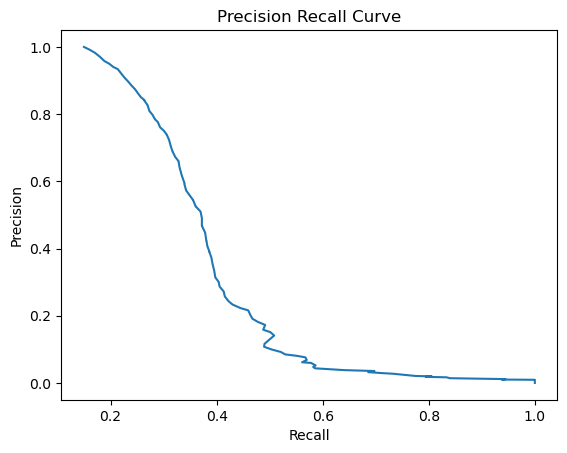

In [34]:
y_pred_prob = rf_model_2.predict_proba(X_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')

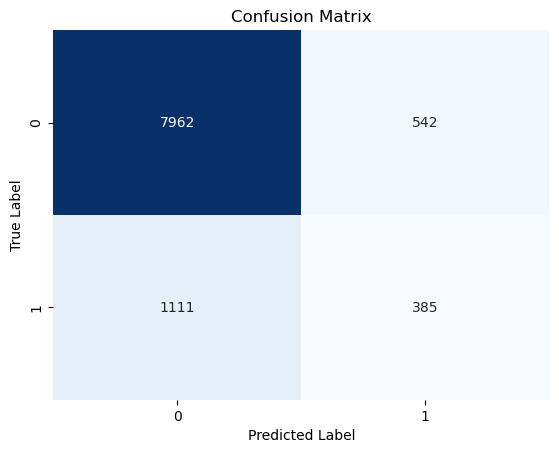

In [164]:
conf_matrix_3 = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix_3, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [172]:
# Access feature importances
feature_importances = rf_model_2.steps[-1][1].feature_importances_

In [173]:
# Create a DataFrame to display feature importances
importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
print(importances_df)

                  Feature  Importance
12        flight_duration    0.227107
11  wants_in_flight_meals    0.202186
10   wants_preferred_seat    0.105897
2               trip_type    0.105755
1           sales_channel    0.089947
7                   route    0.077784
3           purchase_lead    0.075925
8          booking_origin    0.051445
0          num_passengers    0.024840
6              flight_day    0.013069
5             flight_hour    0.012337
4          length_of_stay    0.012265
9     wants_extra_baggage    0.001442


## Feature Engineering

In [12]:
data = df.copy()

In [175]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [13]:
num_df = data.select_dtypes(include=['int','float'])

In [14]:
cat_df = data.select_dtypes(exclude=['int','float'])

In [15]:
print(f"Categorical Dataframe : {cat_df.shape}")
print(f"Numerical dataframe : {num_df.shape}")
print(F"Original Data : {data.shape}")

Categorical Dataframe : (50000, 5)
Numerical dataframe : (50000, 9)
Original Data : (50000, 14)


- We'll be applying log transformation and scaling to the following features.

In [16]:
columns_to_transform_2 = ['purchase_lead','length_of_stay','flight_hour','flight_duration']

In [17]:
data[columns_to_transform_2] = data[columns_to_transform_2].apply(lambda x: np.log1p(x))

In [18]:
data[columns_to_transform_2]

,purchase_lead,length_of_stay,flight_hour,flight_duration
0,5.572154,2.995732,2.079442,1.874874
1,4.727388,3.044522,1.386294,1.874874
2,5.497168,3.135494,2.890372,1.874874
3,4.574711,3.465736,1.609438,1.874874
4,4.234107,3.135494,2.772589,1.874874
...,...,...,...,...
49995,3.332205,1.945910,2.302585,1.890095
49996,4.718499,1.945910,1.609438,1.890095
49997,3.218876,1.945910,3.135494,1.890095
49998,2.772589,1.945910,2.484907,1.890095


In [19]:
standard_columns = ['flight_hour','flight_duration']
robust_columns = ['purchase_lead','length_of_stay']

In [21]:
std_scaler = StandardScaler()
rob_scaler = RobustScaler()

data[standard_columns] = std_scaler.fit_transform(data[standard_columns])
data[robust_columns] = rob_scaler.fit_transform(data[robust_columns])

In [22]:
data[columns_to_transform_2]

,purchase_lead,length_of_stay,flight_hour,flight_duration
0,0.974956,0.066873,-0.048288,-1.157825
1,0.466840,0.097840,-1.032517,-1.157825
2,0.929853,0.155580,1.103187,-1.157825
3,0.375007,0.365186,-0.715666,-1.157825
4,0.170138,0.155580,0.935942,-1.157825
...,...,...,...,...
49995,-0.372344,-0.599454,0.268563,-1.078118
49996,0.461494,-0.599454,-0.715666,-1.078118
49997,-0.440509,-0.599454,1.451247,-1.078118
49998,-0.708945,-0.599454,0.527450,-1.078118


In [195]:
data.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,0.974956,0.066873,-0.048288,Sat,AKLDEL,New Zealand,1,0,0,-1.157825,0
1,1,Internet,RoundTrip,0.466840,0.097840,-1.032517,Sat,AKLDEL,New Zealand,0,0,0,-1.157825,0
2,2,Internet,RoundTrip,0.929853,0.155580,1.103187,Wed,AKLDEL,India,1,1,0,-1.157825,0
3,1,Internet,RoundTrip,0.375007,0.365186,-0.715666,Sat,AKLDEL,New Zealand,0,0,1,-1.157825,0
4,2,Internet,RoundTrip,0.170138,0.155580,0.935942,Wed,AKLDEL,India,1,0,1,-1.157825,0


In [23]:
X = data.drop(columns=['booking_complete'])
y = data['booking_complete']

In [197]:
X.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
0,2,Internet,RoundTrip,0.974956,0.066873,-0.048288,Sat,AKLDEL,New Zealand,1,0,0,-1.157825
1,1,Internet,RoundTrip,0.466840,0.097840,-1.032517,Sat,AKLDEL,New Zealand,0,0,0,-1.157825
2,2,Internet,RoundTrip,0.929853,0.155580,1.103187,Wed,AKLDEL,India,1,1,0,-1.157825
3,1,Internet,RoundTrip,0.375007,0.365186,-0.715666,Sat,AKLDEL,New Zealand,0,0,1,-1.157825
4,2,Internet,RoundTrip,0.170138,0.155580,0.935942,Wed,AKLDEL,India,1,0,1,-1.157825


- We'll then target encode
- Perform Smote
- Compare the findings

In [24]:
cat_features = cat_df.columns
cat_features

Index(['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin'], dtype='object')

In [25]:
data[cat_features]

,sales_channel,trip_type,flight_day,route,booking_origin
0,Internet,RoundTrip,Sat,AKLDEL,New Zealand
1,Internet,RoundTrip,Sat,AKLDEL,New Zealand
2,Internet,RoundTrip,Wed,AKLDEL,India
3,Internet,RoundTrip,Sat,AKLDEL,New Zealand
4,Internet,RoundTrip,Wed,AKLDEL,India
...,...,...,...,...,...
49995,Internet,RoundTrip,Sat,PERPNH,Australia
49996,Internet,RoundTrip,Sun,PERPNH,Australia
49997,Internet,RoundTrip,Sat,PERPNH,Australia
49998,Internet,RoundTrip,Mon,PERPNH,Australia


In [26]:
target_enc = TargetEncoder()
cat_target_enc = target_enc.fit_transform(cat_df,y)

In [27]:
cat_target_enc

,sales_channel,trip_type,flight_day,route,booking_origin
0,0.15477,0.150575,0.148142,0.074780,0.050279
1,0.15477,0.150575,0.148142,0.074780,0.050279
2,0.15477,0.150575,0.163148,0.074780,0.103150
3,0.15477,0.150575,0.148142,0.074780,0.050279
4,0.15477,0.150575,0.163148,0.074780,0.103150
...,...,...,...,...,...
49995,0.15477,0.150575,0.148142,0.058824,0.050358
49996,0.15477,0.150575,0.141440,0.058824,0.050358
49997,0.15477,0.150575,0.148142,0.058824,0.050358
49998,0.15477,0.150575,0.148605,0.058824,0.050358


In [28]:
X.drop(columns=['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin'],inplace=True)

In [29]:
X = pd.concat([X,cat_target_enc],axis=1)

In [30]:
smote = SMOTE(sampling_strategy='auto',random_state=42,n_jobs=-1)

rf_model_4 = make_imb_pipeline(smote, RandomForestClassifier(n_estimators=100, random_state=42))


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [32]:
print(X_train.shape)
print(X_test.shape)

(40000, 13)
(10000, 13)


In [219]:
scores = cross_validate(rf_model_4,X_train,y_train,cv=5,scoring=['precision','accuracy','recall',])

In [222]:
for key,values in scores.items():
    print(key,values,values.mean())

fit_time [14.82315445 12.0997541  12.42148471 12.14110851 12.06309223] 12.709718799591064
score_time [0.18600035 0.22964025 0.20055795 0.19120598 0.18563676] 0.19860825538635254
test_precision [0.43568465 0.4270073  0.42823529 0.42631579 0.42926829] 0.4293022645694472
test_accuracy [0.838875 0.8355   0.83525  0.836375 0.835875] 0.836375
test_recall [0.26337793 0.29347826 0.30434783 0.27067669 0.2940685 ] 0.285189841940414


In [224]:
rf_model_4.fit(X_train,y_train)


Pipeline(steps=[('smote', SMOTE(n_jobs=-1, random_state=42)),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [226]:
y_pred_4 = rf_model_4.predict(X_test)

In [228]:
print('ACCURACY: ',accuracy_score(y_test,y_pred_4)*100)
print('AUC score: ',roc_auc_score(y_test,y_pred_4))

ACCURACY:  83.64
AUC score:  0.6057960770898627


In [242]:
print('ACCURACY: ',precision_score(y_test,y_pred_4)*100)
print('AUC score: ',recall_score(y_test,y_pred_4))

ACCURACY:  42.768595041322314
AUC score:  0.2767379679144385


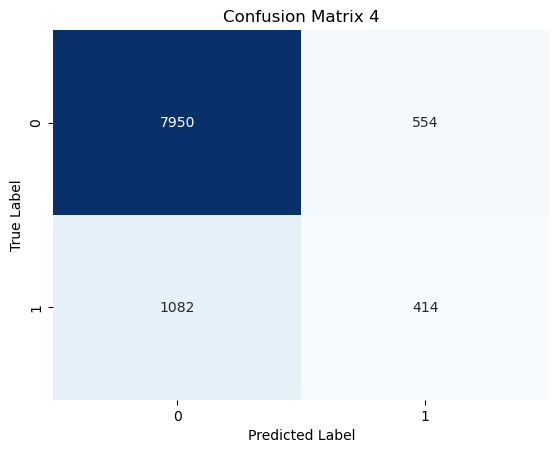

In [234]:
confusion_matrix_4 = confusion_matrix(y_test,y_pred_4)
sns.heatmap(confusion_matrix_4,annot=True,fmt='d',cmap='Blues',cbar=False)
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.title("Confusion Matrix 4")
plt.show()

In [235]:
df['booking_complete'].value_counts()

booking_complete
0    42522
1     7478
Name: count, dtype: int64

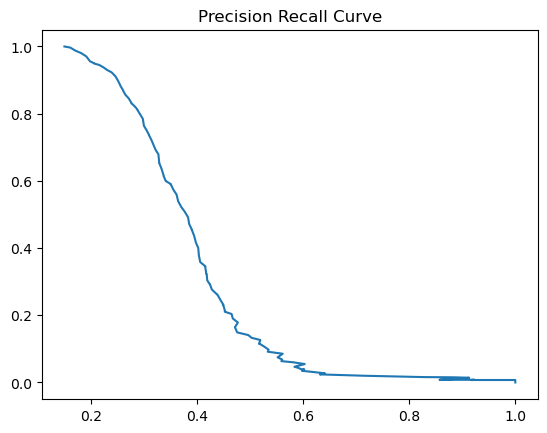

In [239]:
y_pred_proba = rf_model_4.predict_proba(X_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(precision,recall)
plt.title("Precision Recall Curve")
plt.show()


In [241]:
auc_score = roc_auc_score(y_test,y_pred_4)
auc_score

0.6057960770898627

### Hyperparameter Tuning

In [246]:
rf_model_4.named_steps['randomforestclassifier'].get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [248]:
param_grid = {
    'randomforestclassifier__criterion': ['gini', 'entropy'],
    'randomforestclassifier__max_depth': [2, 4, 6, 10, 20],
    'randomforestclassifier__max_features': ['sqrt', 'log2', None],
    'smote__sampling_strategy': ['auto', 0.5, 0.75, 1.0],
    'randomforestclassifier__min_samples_leaf': [None, 2, 4, 6],
    'randomforestclassifier__min_samples_split': [1, 2, 4, 6, 8, 10],
    'randomforestclassifier__n_estimators': [50, 80, 100, 120, 150]
}


In [257]:
scoring = {'accuracy': 'accuracy', 'auc': 'roc_auc'}

random_search = RandomizedSearchCV(
    rf_model_4,
    param_distributions=param_grid,
    n_iter=10,
    scoring=scoring,
    refit='auc',
    cv=5,
    random_state=42,
    n_jobs=-1
)

In [258]:
random_search.fit(X_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('smote',
                                              SMOTE(n_jobs=-1,
                                                    random_state=42)),
                                             ('randomforestclassifier',
                                              RandomForestClassifier(random_state=42))]),
                   n_jobs=-1,
                   param_distributions={'randomforestclassifier__criterion': ['gini',
                                                                              'entropy'],
                                        'randomforestclassifier__max_depth': [2,
                                                                              4,
                                                                              6,
                                                                              10,
                                                                              20],
                                        'randomforestclassifier__max_features': ['sqrt',
                                                                                 'log2',
                                                                                 None],
                                        'randomforestclassifier__min_samples_leaf': [None,
                                                                                     2,
                                                                                     4,
                                                                                     6],
                                        'randomforestclassifier__min_samples_split': [1,
                                                                                      2,
                                                                                      4,
                                                                                      6,
                                                                                      8,
                                                                                      10],
                                        'randomforestclassifier__n_estimators': [50,
                                                                                 80,
                                                                                 100,
                                                                                 120,
                                                                                 150],
                                        'smote__sampling_strategy': ['auto',
                                                                     0.5, 0.75,
                                                                     1.0]},
                   random_state=42, refit='auc',
                   scoring={'accuracy': 'accuracy', 'auc': 'roc_auc'})

In [259]:
random_search.best_score_

0.7971380011964199

In [260]:
random_search.best_params_

{'smote__sampling_strategy': 0.75,
 'randomforestclassifier__n_estimators': 150,
 'randomforestclassifier__min_samples_split': 8,
 'randomforestclassifier__min_samples_leaf': 6,
 'randomforestclassifier__max_features': 'sqrt',
 'randomforestclassifier__max_depth': 20,
 'randomforestclassifier__criterion': 'entropy'}

In [34]:
hyper_smote = SMOTE(sampling_strategy=0.75,random_state=42,n_jobs=-1)

hyperparam_model = make_imb_pipeline(hyper_smote, RandomForestClassifier(n_estimators=150,
                                                             min_samples_split=8,
                                                             min_samples_leaf=6,
                                                             max_features='sqrt',
                                                             max_depth=20, 
                                                             random_state=42))

In [35]:
hyperparam_model.fit(X_train,y_train)

c:\Users\user\anaconda3\envs\british_airways\Lib\site-packages\imblearn\over_sampling\_smote\base.py:345: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Pipeline(steps=[('smote',
                 SMOTE(n_jobs=-1, random_state=42, sampling_strategy=0.75)),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=20, min_samples_leaf=6,
                                        min_samples_split=8, n_estimators=150,
                                        random_state=42))])

In [36]:
y_pred_param = hyperparam_model.predict(X_test)

In [39]:
print('ACCURACY: ',accuracy_score(y_test,y_pred_param)*100)
print('AUC score: ',roc_auc_score(y_test,y_pred_param))

ACCURACY:  82.78
AUC score:  0.6293842218320664


In [74]:
from sklearn.metrics import confusion_matrix

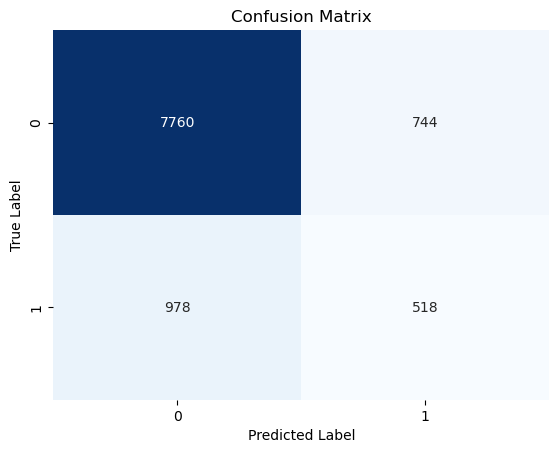

In [77]:
confusion_matrix_param = confusion_matrix(y_test,y_pred_param)
sns.heatmap(confusion_matrix_param,annot=True,fmt='d',cmap='Blues',cbar=False)
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.title("Confusion Matrix")
plt.savefig("conf_matrix.png")
plt.show()

In [40]:
classifier = hyperparam_model.named_steps['randomforestclassifier']

In [41]:
param_feature_importances = classifier.feature_importances_

In [42]:
# Create a DataFrame to display feature importances
importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': param_feature_importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
print(importances_df)

                  Feature  Importance
12         booking_origin    0.303850
11                  route    0.220210
2          length_of_stay    0.104196
10             flight_day    0.096658
7         flight_duration    0.079097
8           sales_channel    0.060409
1           purchase_lead    0.052077
3             flight_hour    0.042990
0          num_passengers    0.011493
4     wants_extra_baggage    0.011419
5    wants_preferred_seat    0.008926
6   wants_in_flight_meals    0.007926
9               trip_type    0.000749


In [54]:
plt_df = importances_df.sort_values(by='Importance')
plt_df

,Feature,Importance
9,trip_type,0.000749
6,wants_in_flight_meals,0.007926
5,wants_preferred_seat,0.008926
4,wants_extra_baggage,0.011419
0,num_passengers,0.011493
3,flight_hour,0.042990
1,purchase_lead,0.052077
8,sales_channel,0.060409
7,flight_duration,0.079097
10,flight_day,0.096658


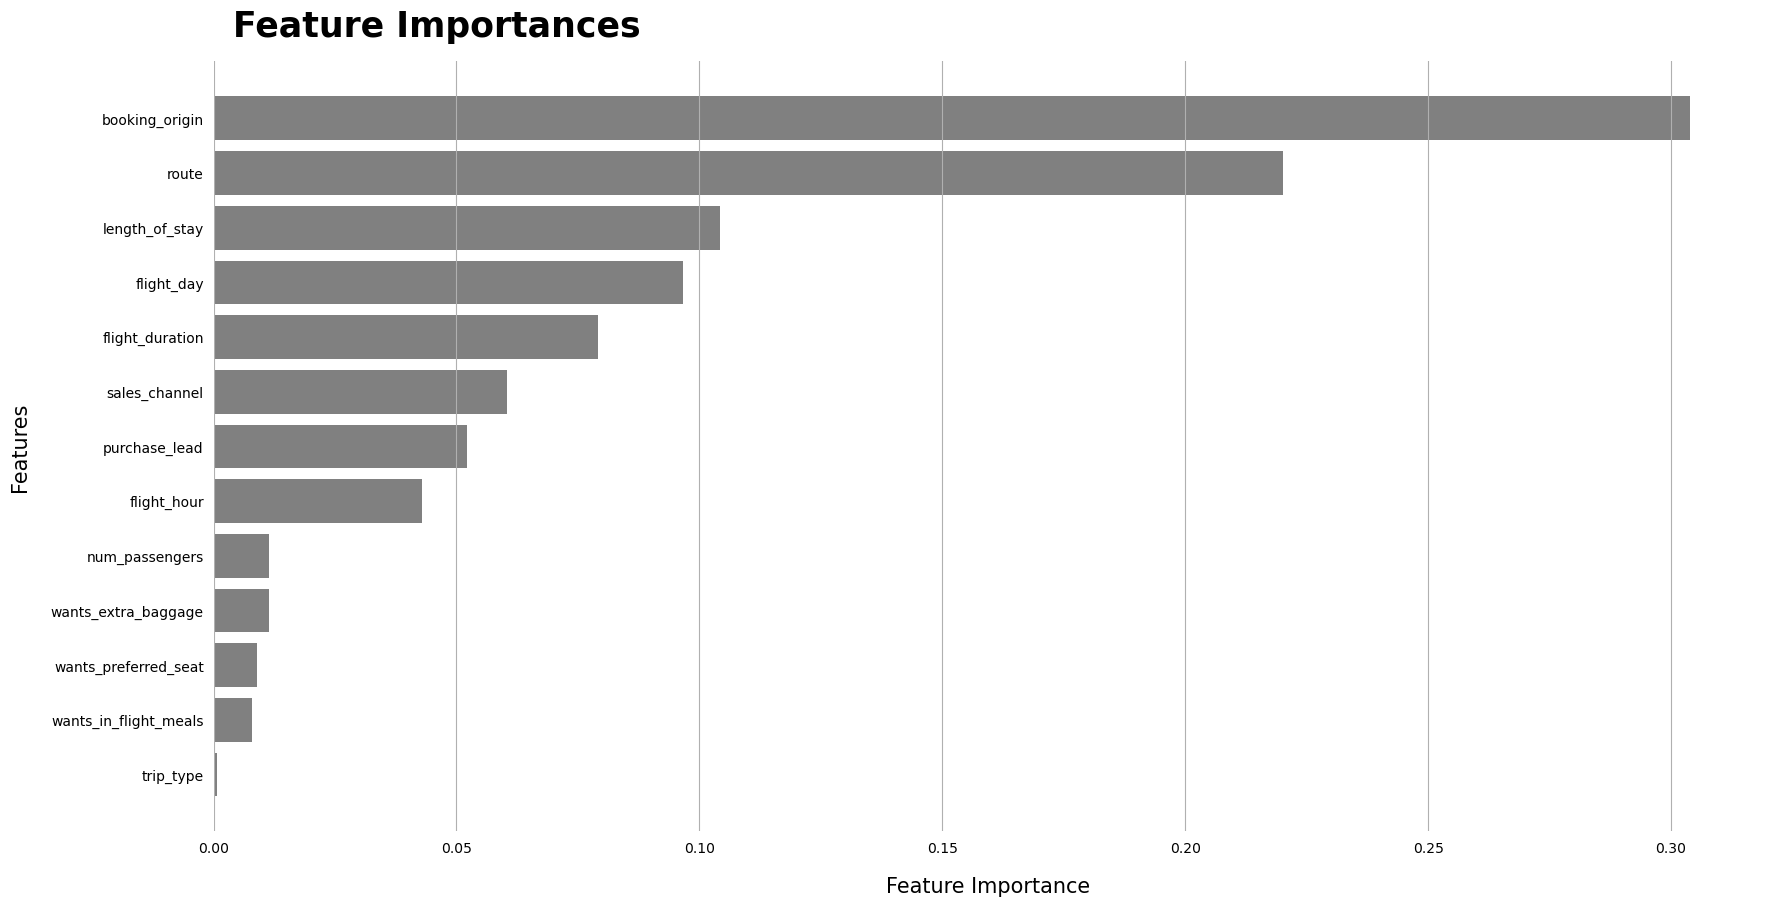

In [71]:
plt.figure(figsize=(20,10))
colors = "Grey"
plt.barh(plt_df['Feature'],plt_df['Importance'],color=colors)
sns.despine(top=True,right=True,bottom=True,left=True)
plt.tick_params(left=False,bottom=False)
plt.grid(axis='x')
plt.xlabel("Feature Importance",labelpad=15,fontsize=15)
plt.ylabel("Features",labelpad=15,fontsize=15)
plt.text(x=0.004,y=13.5,s='Feature Importances',weight='bold',fontsize=25)
plt.savefig("Importances_df.png")
plt.show()
